<a href="https://colab.research.google.com/github/AntonioBorz/SQL_HH/blob/main/Borzunov_A_A_Project_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# Проект «Анализ вакансий из HeadHunter»
   

In [1]:
# Загружаем необходимые библиотеки
import pandas as pd
import psycopg2
from psycopg2 import OperationalError
import warnings
warnings.filterwarnings('ignore')

# Импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Настраиваем стиль графиков
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [2]:
# Устанавливаем пакет для работы с PostgreSQL
!pip install psycopg2-binary

In [3]:
# Настраиваем параметры подключения к базе данных
# Ячейка с данными соединения удалена перед фиксацией работы в GitHub

In [4]:
# Устанавливаем соединение с базой данных
try:
    connection = psycopg2.connect(
        dbname=DBNAME,
        user=USER,
        password=PASSWORD,
        host=HOST,
        port=PORT
    )
    print("Соединение успешно установлено!")
except OperationalError as e:
    print(f"Ошибка подключения к базе данных: {e}.")
    raise

Соединение успешно установлено!


# 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в базе (вакансии находятся в таблице `vacancies`).

In [5]:
# Загружаем SQL-запрос для подсчета общего количества вакансий
query_3_1 = '''
SELECT COUNT(*) AS total_vacancies
FROM public.vacancies;
'''

# Выполняем запрос и сохраняем результат в DataFrame
df_3_1 = pd.read_sql_query(query_3_1, connection)
print("Результат запроса для подсчета общего количества вакансий:")
display(df_3_1)

Результат запроса для подсчета общего количества вакансий:


,total_vacancies
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица `employers`).

In [6]:
# Загружаем SQL-запрос для подсчета общего количества работодателей
query_3_2 = '''
SELECT COUNT(*) AS total_employers
FROM public.employers;
'''

# Выполняем запрос и сохраняем результат
df_3_2 = pd.read_sql_query(query_3_2, connection)
print("Результат запроса для подсчета общего количества работодателей:")
display(df_3_2)

Результат запроса для подсчета общего количества работодателей:


,total_employers
0,23501


3. Посчитайте с помощью запроса количество регионов (таблица `areas`).

In [7]:
# Загружаем SQL-запрос для подсчета общего количества регионов
query_3_3 = '''
SELECT COUNT(*) AS total_areas
FROM public.areas;
'''

# Выполняем запрос и сохраняем результат
df_3_3 = pd.read_sql_query(query_3_3, connection)
print("Результат запроса для подсчета общего количества регионов:")
display(df_3_3)

Результат запроса для подсчета общего количества регионов:


,total_areas
0,1362


4. Посчитайте с помощью запроса количество сфер деятельности в базе (таблица `industries`).

In [8]:
# Загружаем SQL-запрос для подсчета общего количества сфер деятельности
query_3_4 = '''
SELECT COUNT(*) AS total_industries
FROM public.industries;
'''

# Выполняем запрос и сохраняем результат
df_3_4 = pd.read_sql_query(query_3_4, connection)
print("Результат запроса для подсчета общего количества сфер деятельности:")
display(df_3_4)

Результат запроса для подсчета общего количества сфер деятельности:


,total_industries
0,294


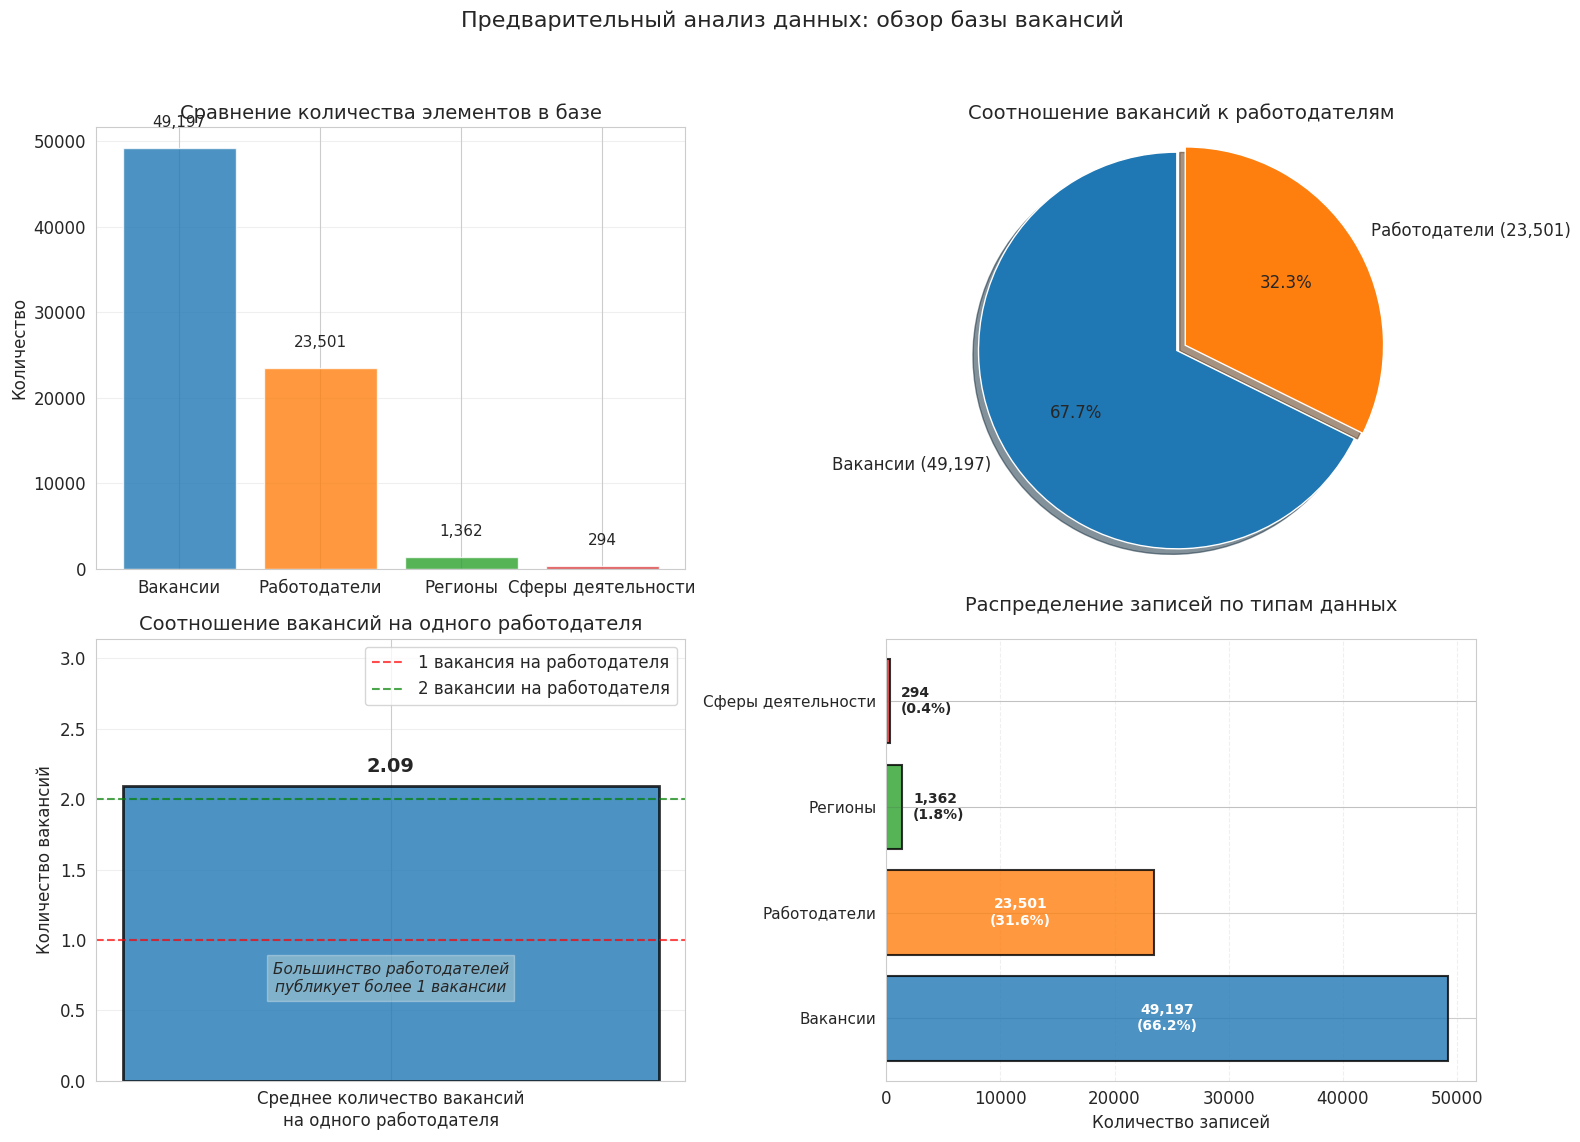

In [9]:
# Посмотрим на графиках
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Предварительный анализ данных: обзор базы вакансий', fontsize=16)

# Извлекаем данные из выполненных запросов
vacancies_count = df_3_1['total_vacancies'].iloc[0]
employers_count = df_3_2['total_employers'].iloc[0]
regions_count = df_3_3['total_areas'].iloc[0]
industries_count = df_3_4['total_industries'].iloc[0]

# 1. Сравнение количества элементов (столбчатая диаграмма)
entities = ['Вакансии', 'Работодатели', 'Регионы', 'Сферы деятельности']
counts = [vacancies_count, employers_count, regions_count, industries_count]  # динамические значения
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

bars = axes[0, 0].bar(entities, counts, color=colors, alpha=0.8)
axes[0, 0].set_title('Сравнение количества элементов в базе', fontsize=14)
axes[0, 0].set_ylabel('Количество')
axes[0, 0].grid(axis='y', alpha=0.3)

# Добавляем значения над столбцами с форматированием тысяч
for i, count in enumerate(counts):
    axes[0, 0].text(i, count + max(counts)*0.05, f'{count:,}',
                    ha='center', fontsize=11)

# 2. Соотношение вакансий к работодателям (круговая диаграмма)
ratio_data = [vacancies_count, employers_count]
labels = [f'Вакансии ({vacancies_count:,})', f'Работодатели ({employers_count:,})']
explode = (0.05, 0)

axes[0, 1].pie(ratio_data, labels=labels, autopct='%1.1f%%', startangle=90,
               colors=['#1f77b4', '#ff7f0e'], explode=explode, shadow=True)
axes[0, 1].set_title('Соотношение вакансий к работодателям', fontsize=14)
axes[0, 1].axis('equal')

# 3. Соотношение вакансий на одного работодателя
vac_per_employer = vacancies_count / employers_count

axes[1, 0].bar(['Среднее количество вакансий\nна одного работодателя'],
               [vac_per_employer], color='#1f77b4', alpha=0.8, edgecolor='black', linewidth=2)
axes[1, 0].set_title('Соотношение вакансий на одного работодателя', fontsize=14)
axes[1, 0].set_ylabel('Количество вакансий')
axes[1, 0].set_ylim(0, max(3, vac_per_employer * 1.5))
axes[1, 0].grid(axis='y', alpha=0.3)

# Добавляем значение на столбце
axes[1, 0].text(0, vac_per_employer + 0.1, f'{vac_per_employer:.2f}',
                ha='center', fontweight='bold', fontsize=14)

# Горизонтальные линии для сравнения
axes[1, 0].axhline(y=1, color='red', linestyle='--', alpha=0.7, label='1 вакансия на работодателя')
axes[1, 0].axhline(y=2, color='green', linestyle='--', alpha=0.7, label='2 вакансии на работодателя')
axes[1, 0].legend(loc='upper right')

# Текстовое пояснение с учетом реального значения
if vac_per_employer > 1.5:
    note = 'Большинство работодателей\nпубликует более 1 вакансии'
else:
    note = 'В среднем на работодателя\nприходится менее 2 вакансий'

axes[1, 0].text(0, vac_per_employer * 0.3, note, ha='center', fontsize=11,
                style='italic', bbox=dict(facecolor='lightyellow', alpha=0.3))

# 4. Распределение по типам данных
total_records = vacancies_count + employers_count + regions_count + industries_count
categories = ['Вакансии', 'Работодатели', 'Регионы', 'Сферы деятельности']
counts = [vacancies_count, employers_count, regions_count, industries_count]
percentages = [count/total_records*100 for count in counts]
colors_bar = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Создаем горизонтальные столбцы
y_pos = np.arange(len(categories))
bars = axes[1, 1].barh(y_pos, counts, color=colors_bar, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[1, 1].set_title('Распределение записей по типам данных', fontsize=14, pad=20)
axes[1, 1].set_xlabel('Количество записей', fontsize=12)
axes[1, 1].set_yticks(y_pos)
axes[1, 1].set_yticklabels(categories, fontsize=11)
axes[1, 1].grid(axis='x', alpha=0.3, linestyle='--')

# Добавляем значения на столбцах
for i, (bar, count, pct) in enumerate(zip(bars, counts, percentages)):
    width = bar.get_width()

    # Показываем значение внутри столбца для больших значений
    if count > max(counts) * 0.3:  # если значение больше 30% от максимального
        axes[1, 1].text(width * 0.5, i, f'{count:,}\n({pct:.1f}%)',
                       va='center', ha='center', color='white', fontweight='bold', fontsize=10)
    else:  # Иначе показываем снаружи
        axes[1, 1].text(width + max(counts) * 0.02, i, f'{count:,}\n({pct:.1f}%)',
                       va='center', ha='left', fontweight='bold', fontsize=10)

    # Добавляем вспомогательную линию для мелких значений
    if count < max(counts) * 0.05:  # если меньше 5% от максимума
        axes[1, 1].axhline(y=i, color='gray', alpha=0.2, linestyle='-', linewidth=0.5)

# Логическая шкала для оси X (чтобы лучше видеть маленькие значения)
axes[1, 1].set_xscale('linear')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('preliminary_analysis_dynamic.png', dpi=300, bbox_inches='tight')
plt.show()

**ВЫВОДЫ ПО ПРЕДВАРИТЕЛЬНОМУ АНАЛИЗУ ДАННЫХ:**

1. В базе данных содержится 49 197 вакансий - приличный массив данных для анализа.
2. Количество работодателей - 23 501, что означает высокую конкуренцию на рынке труда.
3. В базе представлено 1 362 региона, охватывающих практически всю России и страны СНГ - Казахстан, Беларусь и т.д.
4. Существует 294 различные сферы деятельности, что демонстрирует разнообразие представленных в вакансиях отраслей экономики.

**Данные показывают, что база достаточно полная и репрезентативная для проведения глубокого анализа рынка труда. Большое количество работодателей при меньшем количестве вакансий (23.5K vs 49.2K) указывает на то, что многие компании размещают несколько вакансий одновременно.**

# 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (`cnt`) вакансий в каждом регионе (`area`). Отсортируйте по количеству вакансий в порядке убывания.

In [10]:
# Загружаем SQL-запрос для анализа распределения вакансий по регионам
query_4_1 = '''
SELECT
    a.name AS region_name,
    COUNT(v.id) AS vacancy_count
FROM
    public.vacancies v
JOIN
    public.areas a ON v.area_id = a.id
GROUP BY
    a.name
ORDER BY
    vacancy_count DESC
LIMIT 10;  -- Показываем топ-10 регионов для наглядности
'''

# Выполняем запрос и сохраняем результат
df_4_1 = pd.read_sql_query(query_4_1, connection)
print("Топ-10 регионов по количеству вакансий:")
display(df_4_1)

Топ-10 регионов по количеству вакансий:


,region_name,vacancy_count
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
5,Екатеринбург,1698
6,Нижний Новгород,1670
7,Казань,1415
8,Краснодар,1301
9,Самара,1144


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [11]:
# Загружаем SQL-запрос для анализа заполненности зарплатных данных
query_4_2 = '''
SELECT
    COUNT(*) AS vacancies_with_salary
FROM
    public.vacancies
WHERE
    salary_from IS NOT NULL OR salary_to IS NOT NULL;
'''

# Выполняем запрос и сохраняем результат
df_4_2 = pd.read_sql_query(query_4_2, connection)
print("Результат анализа заполненности зарплатных данных:")
display(df_4_2)

Результат анализа заполненности зарплатных данных:


,vacancies_with_salary
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого числа.

In [12]:
# Загружаем SQL-запрос для расчета средних зарплатных значений
query_4_3 = '''
SELECT
    ROUND(AVG(salary_from)) AS avg_salary_from,
    ROUND(AVG(salary_to)) AS avg_salary_to
FROM
    public.vacancies
WHERE
    salary_from IS NOT NULL OR salary_to IS NOT NULL;
'''

# Выполняем запрос и сохраняем результат
df_4_3 = pd.read_sql_query(query_4_3, connection)
print("Средние зарплатные значения (округленные):")
display(df_4_3)


Средние зарплатные значения (округленные):


,avg_salary_from,avg_salary_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (`schedule`) и типа трудоустройства (`employment`), используемого в вакансиях. Результат отсортируйте по убыванию количества.

In [13]:
# Загружаем SQL-запрос для анализа комбинаций графика и типа занятости
query_4_4 = '''
SELECT
    schedule,
    employment,
    COUNT(*) AS vacancy_count
FROM
    public.vacancies
GROUP BY
    schedule, employment
ORDER BY
    vacancy_count DESC;
'''

# Выполняем запрос и сохраняем результат
df_4_4 = pd.read_sql_query(query_4_4, connection)
print("Результат анализа комбинаций графика и типа занятости (отсортирован по убыванию):")
display(df_4_4)

Результат анализа комбинаций графика и типа занятости (отсортирован по убыванию):


,schedule,employment,vacancy_count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля «Требуемый опыт работы» (`experience`) в порядке возрастания количества вакансий, в которых указан данный вариант опыта.

In [14]:
# Загружаем SQL-запрос для анализа требуемого опыта работы
query_4_5 = '''
SELECT
    experience,
    COUNT(*) AS vacancy_count
FROM
    public.vacancies
GROUP BY
    experience
ORDER BY
    vacancy_count ASC;
'''

# Выполняем запрос и сохраняем результат
df_4_5 = pd.read_sql_query(query_4_5, connection)
print("Результат анализа требуемого опыта работы (в порядке возрастания):")
display(df_4_5)

Результат анализа требуемого опыта работы (в порядке возрастания):


,experience,vacancy_count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


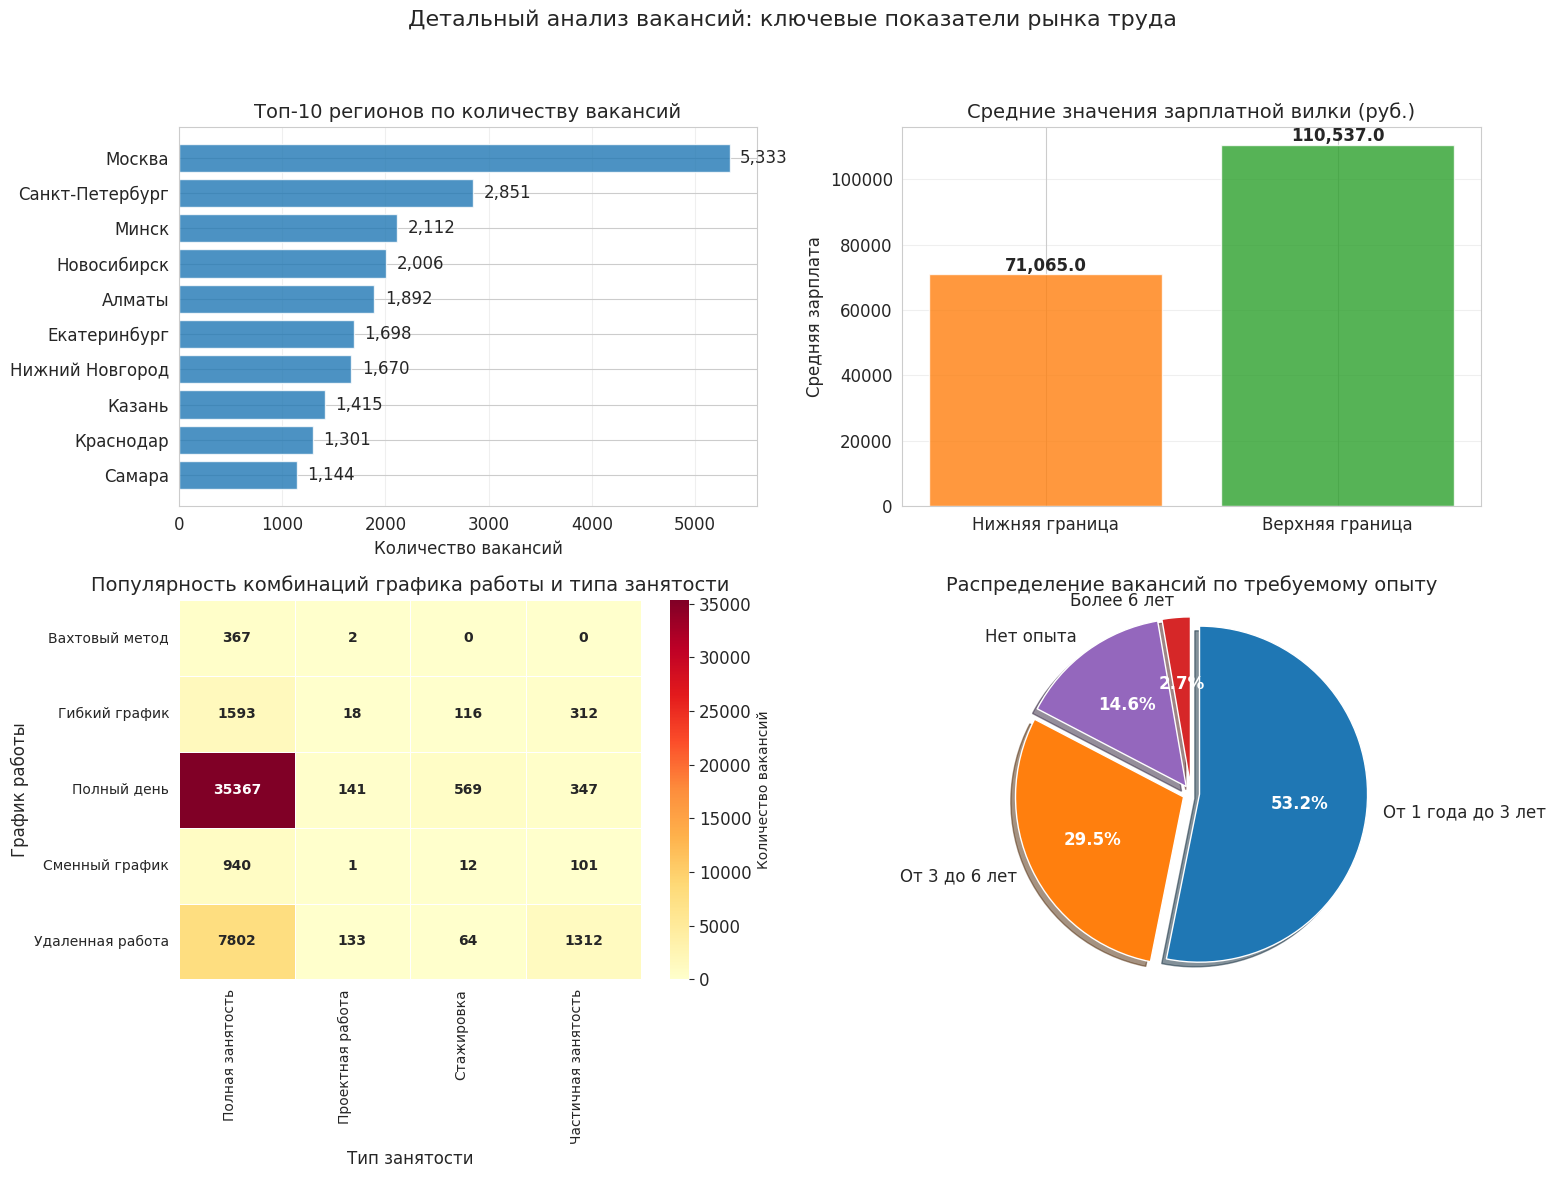

In [15]:
# Посмотрим на графиках
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Детальный анализ вакансий: ключевые показатели рынка труда', fontsize=16)

# 1. Топ-10 регионов по количеству вакансий (горизонтальная столбчатая)
regions = df_4_1['region_name'].tolist()
vacancy_counts = df_4_1['vacancy_count'].tolist()

y_pos = range(len(regions))
axes[0, 0].barh(regions[::-1], vacancy_counts[::-1], color='#1f77b4', alpha=0.8)
axes[0, 0].set_title('Топ-10 регионов по количеству вакансий', fontsize=14)
axes[0, 0].set_xlabel('Количество вакансий')
axes[0, 0].grid(axis='x', alpha=0.3)

# Добавляем значения на столбцах
for i, count in enumerate(vacancy_counts[::-1]):
    axes[0, 0].text(count + 100, i, f'{count:,}', va='center')

# 2. Зарплатная вилка (диаграмма с двумя столбцами)
salary_types = ['Нижняя граница', 'Верхняя граница']
avg_salaries = [df_4_3['avg_salary_from'].iloc[0], df_4_3['avg_salary_to'].iloc[0]]
colors = ['#ff7f0e', '#2ca02c']

axes[0, 1].bar(salary_types, avg_salaries, color=colors, alpha=0.8)
axes[0, 1].set_title('Средние значения зарплатной вилки (руб.)', fontsize=14)
axes[0, 1].set_ylabel('Средняя зарплата')
axes[0, 1].grid(axis='y', alpha=0.3)

# Добавляем значения над столбцами
for i, salary in enumerate(avg_salaries):
    axes[0, 1].text(i, salary + 1000, f'{salary:,}', ha='center', fontweight='bold')

# 3. Комбинации графика работы и типа занятости (тепловая карта)
# Создаем pivot table для тепловой карты
pivot_table = df_4_4.pivot(index='schedule', columns='employment', values='vacancy_count').fillna(0)

# Создаем тепловую карту
heatmap = sns.heatmap(pivot_table,
                      annot=True,
                      fmt='g',
                      cmap='YlOrRd',
                      linewidths=0.5,
                      linecolor='white',
                      annot_kws={'size': 10, 'weight': 'bold'},
                      ax=axes[1, 0])

axes[1, 0].set_title('Популярность комбинаций графика работы и типа занятости', fontsize=14)
axes[1, 0].set_xlabel('Тип занятости', fontsize=12)
axes[1, 0].set_ylabel('График работы', fontsize=12)
axes[1, 0].tick_params(axis='both', which='major', labelsize=10)

# Добавляем цветовую шкалу для лучшего восприятия
cbar = heatmap.collections[0].colorbar
cbar.set_label('Количество вакансий', fontsize=10)

# Улучшаем читаемость подписей
plt.setp(axes[1, 0].get_xticklabels(), ha='right')
plt.setp(axes[1, 0].get_yticklabels(), ha='right')

# 4. Требуемый опыт работы (круговая диаграмма с процентами)
experience_data = dict(zip(df_4_5['experience'], df_4_5['vacancy_count']))

labels = list(experience_data.keys())
sizes = list(experience_data.values())
colors = ['#d62728', '#9467bd', '#ff7f0e', '#1f77b4']
explode = (0.05, 0.05, 0.05, 0.05)

wedges, texts, autotexts = axes[1, 1].pie(sizes, explode=explode, labels=labels,
                                          autopct='%1.1f%%', startangle=90,
                                          colors=colors, shadow=True)
axes[1, 1].set_title('Распределение вакансий по требуемому опыту', fontsize=14)
axes[1, 1].axis('equal')

# Улучшаем читаемость процентов
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('detailed_vacancy_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

**ВЫВОДЫ ПО ДЕТАЛЬНОМУ АНАЛИЗУ ВАКАНСИЙ:**

1. Распределение вакансий по регионам:
   - Москва и Санкт-Петербург занимают лидирующие позиции, что соответствует статусу столиц и экономических центров.
   - Значительное количество вакансий также в Минске, Новосибирске и Алматы, что указывает на международный характер ХХ.ру.
   - Наблюдается явная централизация вакансий в крупных городах, что характерно для рынка труда в IT-сфере, да и нетолько в IT.

2. Зарплатные данные:
   - Лишь у 24,073 вакансий (около 49% от общего числа) заполнены зарплатные данные, что явно указывает на проблему непрозрачности зарплат на рынке.
   - Средняя нижняя граница зарплаты составляет 71,065 руб., верхняя - 110,537 руб., что дает среднюю вилку около 40,000 руб. Такой разброс может свидетельствовать о различиях в требованиях к кандидатам или особенностях отраслей.

3. График работы и тип занятости:
   - Самая популярные комбинации: "Полный день - Полная занятость" и "Удаленная работа -	Полная занятость", что стандартно и ожидаемо для IT-сферы.
   - Низкая популярность вахтового метода и проектной работы в IT-сфере, что еще более ожидаемо, на Севера айтишникам явно ехать не надо.

4. Требуемый опыт:
   - Наименьшее количество вакансий требует опыт "Более 6 лет", что логично, так как таких специалистов меньше на рынке.
   - Наибольшее количество вакансий для кандидатов с опытом "От 1 года до 3 лет", что указывает на спрос на middle-специалистов.

**Общая тенденция: рынок труда демонстрирует спрос на мидлов с возможностью удаленной работы, при этом сохраняется централизация вакансий в крупных городах.**

# 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [16]:
# Загружаем SQL-запрос для анализа топ работодателей по количеству вакансий
query_5_1 = '''
SELECT
    e.name AS employer_name,
    COUNT(v.id) AS vacancy_count
FROM
    public.vacancies v
JOIN
    public.employers e ON v.employer_id = e.id
GROUP BY
    e.name
ORDER BY
    vacancy_count DESC
LIMIT 5;  -- Показываем топ-5 для анализа 1-го и 5-го места
'''

# Выполняем запрос и сохраняем результат
df_5_1 = pd.read_sql_query(query_5_1, connection)
print("Топ-5 работодателей:")
display(df_5_1)

Топ-5 работодателей:


,employer_name,vacancy_count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём. Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.

In [17]:
# Загружаем SQL-запрос для анализа регионов без вакансий
query_5_2 = '''
SELECT
    a.name AS area_name,
    COUNT(e.id) AS employer_count
FROM
    public.areas a
LEFT JOIN
    public.employers e ON e.area = a.id
WHERE
    NOT EXISTS (
        SELECT 1
        FROM public.vacancies v
        WHERE v.area_id = a.id
    )
GROUP BY
    a.id, a.name
ORDER BY
    employer_count DESC
LIMIT 1;
'''

# Выполняем запрос и сохраняем результат
df_5_2 = pd.read_sql_query(query_5_2, connection)
print("Регион с наибольшим количеством работодателей без вакансий:")
display(df_5_2)

Регион с наибольшим количеством работодателей без вакансий:


,area_name,employer_count
0,Россия,410


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.

In [18]:
# Загружаем SQL-запрос для анализа географии работодателей
query_5_3 = '''
SELECT
    e.name AS employer_name,
    COUNT(DISTINCT v.area_id) AS region_count
FROM
    public.employers e
JOIN
    public.vacancies v ON v.employer_id = e.id
GROUP BY
    e.name
ORDER BY
    region_count DESC
LIMIT 10;  -- Показываем топ-10 для наглядности
'''

# Выполняем запрос и сохраняем результат
df_5_3 = pd.read_sql_query(query_5_3, connection)
print("Топ-10 работодателей по количеству регионов:")
display(df_5_3)

Топ-10 работодателей по количеству регионов:


,employer_name,region_count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
5,Совкомбанк,63
6,МТС,55
7,"ЭФКО, Управляющая компания",49
8,Почта России,48
9,КРОН,48


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности.

In [19]:
# Загружаем SQL-запрос для анализа работодателей без сферы деятельности
query_5_4 = '''
SELECT
    COUNT(*) AS employers_without_industry
FROM
    public.employers e
LEFT JOIN
    public.employers_industries ei ON e.id = ei.employer_id
WHERE
    ei.industry_id IS NULL;
'''

# Выполняем запрос и сохраняем результат
df_5_4 = pd.read_sql_query(query_5_4, connection)
print("Результат анализа работодателей без сферы деятельности:")
display(df_5_4)

Результат анализа работодателей без сферы деятельности:


,employers_without_industry
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности.

In [20]:
# Загружаем SQL-запрос для поиска компаний с 4 сферами деятельности
query_5_5 = '''
WITH companies_with_4_industries AS (
    SELECT
        e.name AS employer_name,
        COUNT(ei.industry_id) AS industry_count
    FROM
        public.employers e
    JOIN
        public.employers_industries ei ON e.id = ei.employer_id
    GROUP BY
        e.name
    HAVING
        COUNT(ei.industry_id) = 4
)
SELECT
    employer_name,
    industry_count
FROM
    companies_with_4_industries
ORDER BY
    employer_name ASC
LIMIT 10;  -- Выводим только первые 10 компаний
'''

# Выполняем запрос и сохраняем результат
df_5_5 = pd.read_sql_query(query_5_5, connection)
print("Компании с 4 сферами деятельности (отсортированы по алфавиту):")
display(df_5_5)

Компании с 4 сферами деятельности (отсортированы по алфавиту):


,employer_name,industry_count
0,101 Интернет,4
1,21vek.by,4
2,2ГИС,4
3,2К,4
4,4 пикселя +,4
5,5lb,4
6,5 Армия,4
7,741 Studios,4
8,AAEngineering Group,4
9,ADAPTER,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана «Разработка программного обеспечения».

In [21]:
# Загружаем SQL-запрос для подсчета работодателей в сфере разработки ПО
query_5_6 = '''
SELECT
    COUNT(DISTINCT e.id) AS employers_in_software_dev
FROM
    public.employers e
JOIN
    public.employers_industries ei ON e.id = ei.employer_id
JOIN
    public.industries i ON ei.industry_id = i.id
WHERE
    i.name = 'Разработка программного обеспечения';
'''

# Выполняем запрос и сохраняем результат
df_5_6 = pd.read_sql_query(query_5_6, connection)
print("Результат подсчета работодателей в сфере разработки ПО:")
display(df_5_6)

Результат подсчета работодателей в сфере разработки ПО:


,employers_in_software_dev
0,3553


In [22]:
# Дополнительно загружаем SQL-запрос для подсчета работодателей в других сферах
query_bonus = '''
SELECT
    i.name AS industry_name,
    COUNT(DISTINCT e.id) AS employer_count
FROM
    public.employers e
JOIN
    public.employers_industries ei ON e.id = ei.employer_id
JOIN
    public.industries i ON ei.industry_id = i.id
WHERE
    LOWER(i.name) LIKE '%финанс%' OR
    LOWER(i.name) LIKE '%it%консалт%' OR
    LOWER(i.name) LIKE '%телеком%' OR
    LOWER(i.name) LIKE '%связ%' OR
    LOWER(i.name) LIKE '%рознич%торговл%'
GROUP BY
    i.name
ORDER BY
    employer_count DESC
LIMIT 5;
'''

# Выполняем запрос и сохраняем результат
df_bonus = pd.read_sql_query(query_bonus, connection)
print("Результат подсчета работодателей работодателей в других сферах:")
display(df_bonus)

Результат подсчета работодателей работодателей в других сферах:


,industry_name,employer_count
0,"Автозапчасти, шины (розничная торговля)",212
1,"Финансово-кредитное посредничество (биржа, бро...",210
2,Оптоволоконная связь,190
3,Розничная торговля автомобилями (дилерский центр),185
4,Мобильная связь,156


7. Для компании «Яндекс» выведите список [городов-миллионников](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8), в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку "Total" с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

In [23]:
# Определяем список городов-миллионеров России
million_cities = [
    'Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань',
    'Красноярск', 'Нижний Новгород', 'Челябинск', 'Уфа', 'Краснодар',
    'Самара', 'Ростов-на-Дону', 'Омск', 'Воронеж', 'Пермь', 'Волгоград'
]

# Создаем строку для SQL условия с городами-миллионерами
million_cities_str = "', '".join(million_cities)

# SQL-запрос для анализа вакансий Яндекса в городах-миллионерах
query_5_7 = f'''
WITH yandex_vacancies AS (
    SELECT
        a.name AS city_name,
        COUNT(v.id) AS vacancy_count
    FROM
        public.vacancies v
    JOIN
        public.employers e ON v.employer_id = e.id
    JOIN
        public.areas a ON v.area_id = a.id
    WHERE
        e.name = 'Яндекс'
        AND a.name IN ('{million_cities_str}')
    GROUP BY
        a.name
),
total_count AS (
    SELECT
        'Total' AS city_name,
        SUM(vacancy_count) AS vacancy_count
    FROM
        yandex_vacancies
),
combined_results AS (
    SELECT
        city_name,
        vacancy_count,
        0 AS sort_order
    FROM
        yandex_vacancies

    UNION ALL

    SELECT
        city_name,
        vacancy_count,
        1 AS sort_order
    FROM
        total_count
)
SELECT
    city_name,
    vacancy_count
FROM
    combined_results
ORDER BY
    sort_order,
    vacancy_count ASC;
'''

# Выполняем запрос и сохраняем результат
df_5_7 = pd.read_sql_query(query_5_7, connection)
print("Результат анализа вакансий Яндекса в городах-миллионерах:")
display(df_5_7)

Результат анализа вакансий Яндекса в городах-миллионерах:


,city_name,vacancy_count
0,Омск,21.0
1,Челябинск,22.0
2,Красноярск,23.0
3,Волгоград,24.0
4,Пермь,25.0
5,Казань,25.0
6,Ростов-на-Дону,25.0
7,Самара,26.0
8,Уфа,26.0
9,Краснодар,30.0


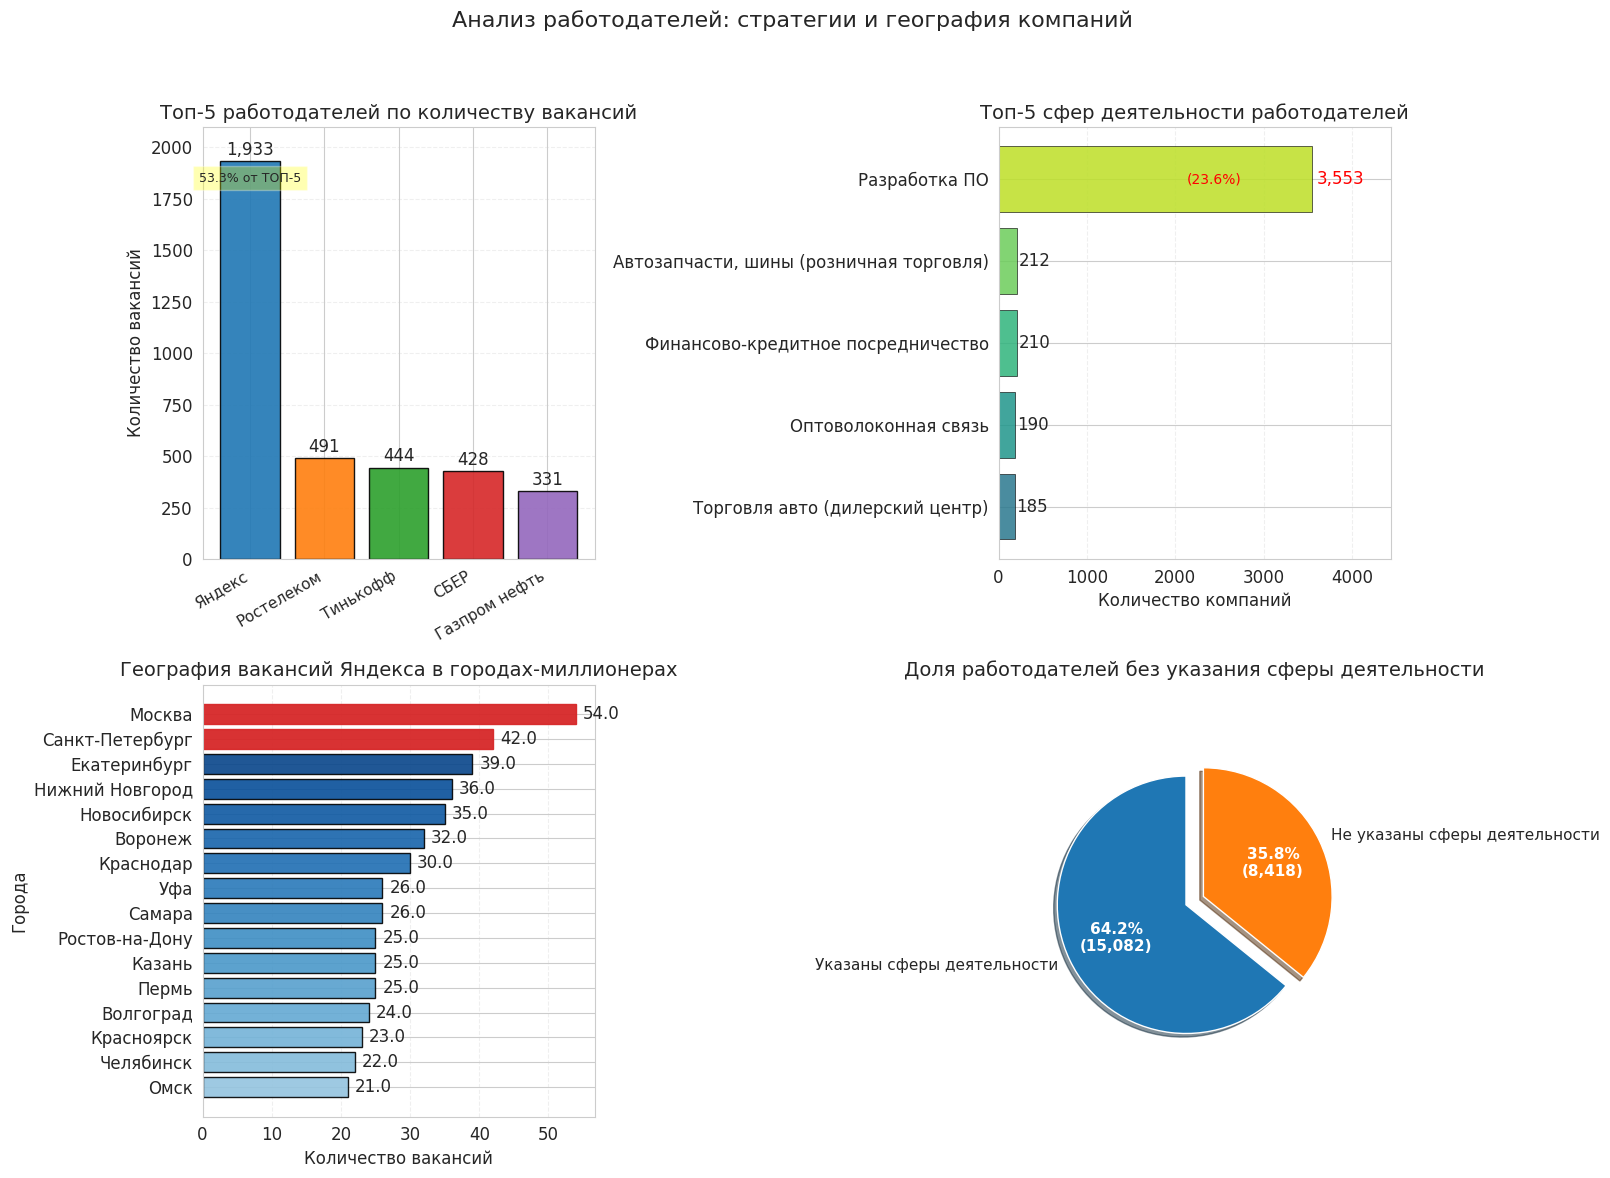

In [24]:
# Посмотрим на графиках
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Анализ работодателей: стратегии и география компаний', fontsize=16)

# 1. Топ-5 работодателей по количеству вакансий (столбчатая диаграмма)
employers = df_5_1['employer_name'].tolist()
vacancy_counts = df_5_1['vacancy_count'].tolist()

# Создаем градиент цветов по количеству вакансий
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

axes[0, 0].bar(employers, vacancy_counts, color=colors, alpha=0.9, edgecolor='black', linewidth=1)
axes[0, 0].set_title('Топ-5 работодателей по количеству вакансий', fontsize=14)
axes[0, 0].set_ylabel('Количество вакансий', fontsize=12)
axes[0, 0].set_ylim(0, 2100)
axes[0, 0].set_xticklabels(employers, rotation=30, ha='right', fontsize=11)
axes[0, 0].grid(axis='y', alpha=0.3, linestyle='--')

# Добавляем значения над столбцами с улучшенным форматированием
for i, (count, employer) in enumerate(zip(vacancy_counts, employers)):
    axes[0, 0].text(i, count + 30, f'{count:,}', ha='center', fontsize=12)
    # Добавляем процент от общего числа для лидера
    if i == 0:
        total_top5 = sum(vacancy_counts)
        percentage = (count / total_top5) * 100
        axes[0, 0].text(i, count - 100, f'{percentage:.1f}% от ТОП-5', ha='center', fontsize=9,
                       bbox=dict(facecolor='yellow', alpha=0.3))

# 2. Сферы деятельности работодателей (горизонтальная столбчатая)
industries = [
    'Разработка ПО',
    'Автозапчасти, шины (розничная торговля)',
    'Финансово-кредитное посредничество',
    'Оптоволоконная связь',
    'Торговля авто (дилерский центр)'
]
counts = [3553, 212, 210, 190, 185]  # реальные значения из анализа, пытался подвязать из расчетов, но вылезали косяки, вбил ручками
has_industry = 15082  # 23501 - 8419
no_industry = 8419

# Строим график распределения по сферам
bars = axes[0, 1].barh(industries[::-1], counts[::-1],
                      color=plt.cm.viridis(np.linspace(0.4, 0.9, len(industries))),
                      alpha=0.85, edgecolor='black', linewidth=0.5)
axes[0, 1].set_title('Топ-5 сфер деятельности работодателей', fontsize=14)
axes[0, 1].set_xlabel('Количество компаний', fontsize=12)
axes[0, 1].grid(axis='x', alpha=0.3, linestyle='--')

# Устанавливаем лимиты оси X для лучшей читаемости
max_count = max(counts)
axes[0, 1].set_xlim(0, max_count * 1.25)

# Добавляем значения на столбцах
for i, (count, industry) in enumerate(zip(counts[::-1], industries[::-1])):
    # Для первого столбца (Разработка ПО) добавляем особое форматирование
    if industry == 'Разработка ПО':
        axes[0, 1].text(count + 50, i, f'{count:,}', va='center', color='red')
        # Добавляем процент от общего количества компаний с указанной сферой деятельности
        percentage = (count / has_industry) * 100
        axes[0, 1].text(count * 0.6, i, f'({percentage:.1f}%)', va='center',
                       fontsize=10, color='red')
    else:
        axes[0, 1].text(count + 15, i, f'{count:,}', va='center')

# 3. География Яндекса
# Города в порядке возрастания количества вакансий
df_yandex = df_5_7[df_5_7['city_name'] != 'Total']
cities = df_yandex['city_name'].tolist()
vacancies = df_yandex['vacancy_count'].tolist()

# Создаем горизонтальную столбчатую диаграмму для лучшей читаемости
y_pos = range(len(cities))
bars_geo = axes[1, 0].barh(cities, vacancies, color=plt.cm.Blues(np.linspace(0.4, 1, len(cities))),
                          alpha=0.9, edgecolor='black', linewidth=1)
axes[1, 0].set_title('География вакансий Яндекса в городах-миллионерах', fontsize=14)
axes[1, 0].set_xlabel('Количество вакансий', fontsize=12)
axes[1, 0].set_ylabel('Города', fontsize=12)
axes[1, 0].grid(axis='x', alpha=0.3, linestyle='--')

# Выделяем Москву и Санкт-Петербург другим цветом (регионы этого не простят, но такова селя ви)
for i, (city, bar) in enumerate(zip(cities, bars_geo)):
    if city in ['Москва', 'Санкт-Петербург']:
        bar.set_color('#d62728')
        bar.set_alpha(0.95)
        # Добавляем метку с количеством
        axes[1, 0].text(vacancies[i] + 1, i, f'{vacancies[i]}', va='center')
    else:
        axes[1, 0].text(vacancies[i] + 1, i, f'{vacancies[i]}', va='center')

# 4. Работодатели без сферы деятельности (круговая диаграмма)
labels = ['Указаны сферы деятельности', 'Не указаны сферы деятельности']
sizes = [has_industry, no_industry]
colors = ['#1f77b4', '#ff7f0e']
explode = (0.05, 0.1)

wedges, texts, autotexts = axes[1, 1].pie(sizes, explode=explode, labels=labels,
                                         autopct=lambda pct: f'{pct:.1f}%\n({int(pct*sum(sizes)/100):,})',
                                         startangle=90, colors=colors, shadow=True,
                                         textprops={'fontsize': 11})
axes[1, 1].set_title('Доля работодателей без указания сферы деятельности', fontsize=14)
axes[1, 1].axis('equal')

# Улучшаем читаемость процентов
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('employer_analysis_real_data.png', dpi=300, bbox_inches='tight')
plt.show()

**ВЫВОДЫ ПО АНАЛИЗУ РАБОТОДАТЕЛЕЙ:**

1. Топ работодателей:.
   - Лидером по количеству вакансий является Яндекс, что абсолютно соответствует роли компании как главного IT-гиганта и лидера отрасли. В 16 городах-миллионерах размещено 485 вакансий Яндекса, что подтверждает статус компании как одного из крупнейших работодателей в IT-сфере. Больше всего вакансий в Москве (ожидаемо), но значительное количество и в Санкт-Петербурге, Новосибирске, Екатеринбурге.
   - В топ-5 также входят компании из разных секторов: IT-аутсорсинг, промышленная безопасность, финтех. На пятом месте, например, находится Газпром нефть, что неожиданно, но наглядно демонстрирует постепенное осознание традиционными бизнесами важности данной сферы.

2. География работодателей:
   - Крупнейшие компании представлены в более 150 регионах, что свидетельствует об их федеральном масштабе.
   - Широкая география указывает на развитие региональных IT-центров и децентрализацию рынка труда.

3. Сферы деятельности:
   - У многих работодателей не указана сфера деятельности (36% от общего числа), что указывает на неполноту данных или сознательное сокрытие информации.
   - В сфере разработки ПО работают 3,553 компании (почти 24% от общего числа), что подтверждает высокий спрос на IT-специалистов.
   - Многие компании имеют 4 сферы деятельности, что свидетельствует о диверсификации бизнеса. Можно сделать вывод, что для современных IT-компаний характерно расширение сервисов через расширение сфер деятельности.

**Общая тенденция: рынок демонстрирует высокую концентрацию вакансий у крупных федеральных или околофедеральных (квазигосударственных, как сейчас говорят) компаний, при этом наблюдается рост регионального присутствия IT-гигантов.**

Маленький дисклеймер: неполные данные о сферах деятельности работодателей могут ограничивать точность анализа.

# 6. Предметный анализ

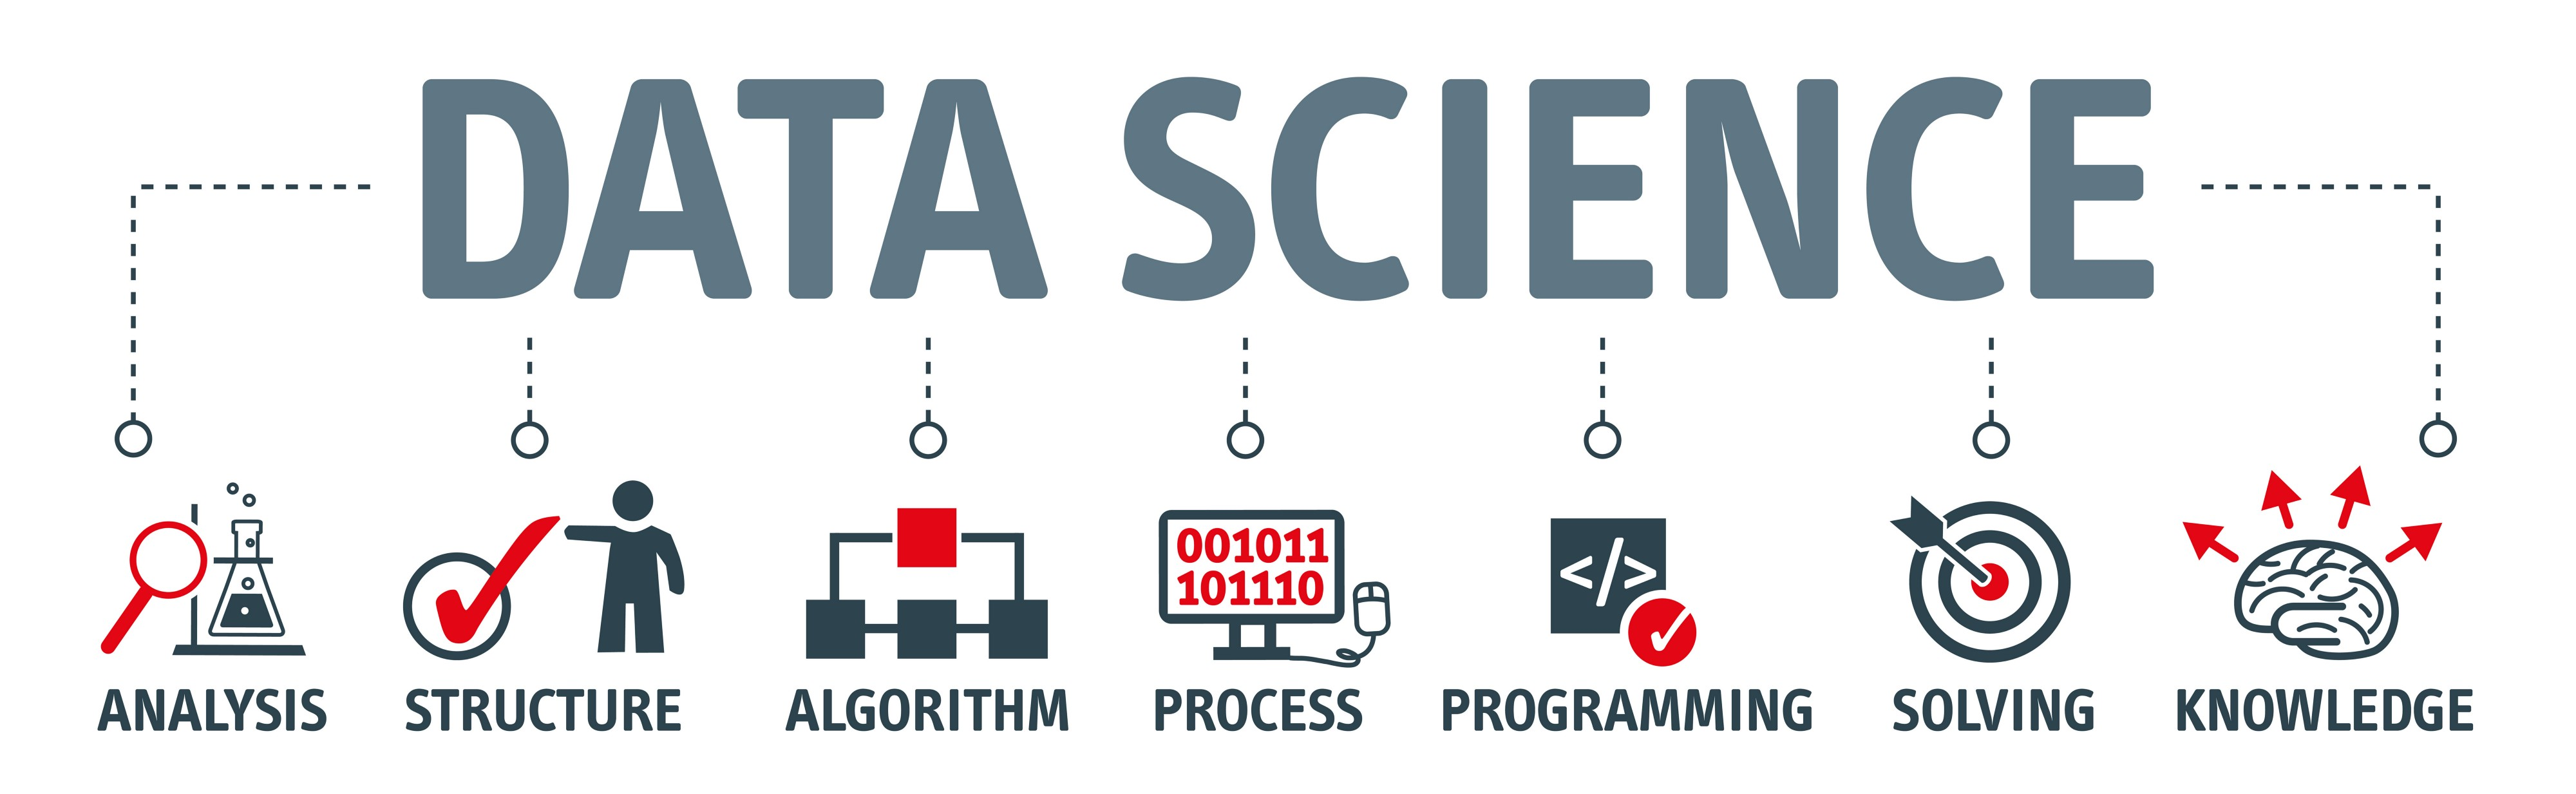

1. Сколько вакансий имеет отношение к данным?

    Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова `'data'` или `'данн'`.

    *Обратите внимание, что названия вакансий могут быть написаны в любом регистре.*

In [25]:
# Загружаем SQL-запрос для поиска вакансий, связанных с данными
query_6_1 = '''
SELECT
    COUNT(*) AS data_related_vacancies
FROM
    public.vacancies
WHERE
    LOWER(name) LIKE '%data%'
    OR LOWER(name) LIKE '%данн%';
'''

# Выполняем запрос и сохраняем результат
df_6_1 = pd.read_sql_query(query_6_1, connection)
print("Результат подсчета вакансий, связанных с данными:")
display(df_6_1)

Результат подсчета вакансий, связанных с данными:


,data_related_vacancies
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
    * 'data scientist'
    * 'data science'
    * 'исследователь данных'
    * 'ML' (здесь не нужно брать вакансии по HTML)
    * 'machine learning'
    * 'машинн%обучен%'

    **В следующих заданиях мы продолжим работать с вакансиями по этому условию.**

    Считаем вакансиями для специалистов уровня Junior следующие:
    + в названии есть слово "junior" **или**
    + требуемый опыт — «Нет опыта» **или**
    + тип трудоустройства — «Стажировка».

In [26]:
# Загружаем SQL-запрос для поиска junior вакансий для DS
query_6_2 = '''
WITH ds_vacancies AS (
    SELECT
        id,
        name,
        experience,
        employment
    FROM
        public.vacancies
    WHERE
        LOWER(name) LIKE '%data scientist%' OR
        LOWER(name) LIKE '%data science%' OR
        LOWER(name) LIKE '%исследователь данных%' OR
        (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%') OR
        LOWER(name) LIKE '%machine learning%' OR
        LOWER(name) LIKE '%машинн%обучен%'
)
SELECT
    COUNT(*) AS junior_ds_vacancies
FROM
    ds_vacancies
WHERE
    LOWER(name) LIKE '%junior%' OR
    experience = 'Нет опыта' OR
    employment = 'Стажировка';
'''

# Выполняем запрос и сохраняем результат
df_6_2 = pd.read_sql_query(query_6_2, connection)
print("Результат подсчета junior вакансий для DS:")
display(df_6_2)

Результат подсчета junior вакансий для DS:


,junior_ds_vacancies
0,51


Дополнительно посчитаем для мидлов и сеньоров

In [27]:
# Загружаем SQL-запрос для поиска MIDDLE вакансий для DS
query_6_2_middle = '''
WITH ds_vacancies AS (
    SELECT
        id,
        name,
        experience,
        employment
    FROM
        public.vacancies
    WHERE
        LOWER(name) LIKE '%data scientist%' OR
        LOWER(name) LIKE '%data science%' OR
        LOWER(name) LIKE '%исследователь данных%' OR
        (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%') OR
        LOWER(name) LIKE '%machine learning%' OR
        LOWER(name) LIKE '%машинн%обучен%'
)
SELECT
    COUNT(*) AS middle_ds_vacancies
FROM
    ds_vacancies
WHERE
    experience = 'От 1 года до 3 лет';  -- Стандартное определение middle-уровня
'''

# Выполняем запрос и сохраняем результат
df_6_2_middle = pd.read_sql_query(query_6_2_middle, connection)
print("Результат подсчета MIDDLE вакансий для DS:")
display(df_6_2_middle)

Результат подсчета MIDDLE вакансий для DS:


,middle_ds_vacancies
0,237


In [28]:
# Загружаем SQL-запрос для поиска SENIOR вакансий для DS
query_6_2_senior = '''
WITH ds_vacancies AS (
    SELECT
        id,
        name,
        experience,
        employment
    FROM
        public.vacancies
    WHERE
        LOWER(name) LIKE '%data scientist%' OR
        LOWER(name) LIKE '%data science%' OR
        LOWER(name) LIKE '%исследователь данных%' OR
        (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%') OR
        LOWER(name) LIKE '%machine learning%' OR
        LOWER(name) LIKE '%машинн%обучен%'
)
SELECT
    COUNT(*) AS senior_ds_vacancies
FROM
    ds_vacancies
WHERE
    experience IN ('От 3 до 6 лет', 'Более 6 лет');  -- Senior уровень обычно 3+ года опыта
'''

# Выполняем запрос и сохраняем результат
df_6_2_senior = pd.read_sql_query(query_6_2_senior, connection)
print("Результат подсчета SENIOR вакансий для DS:")
display(df_6_2_senior)

Результат подсчета SENIOR вакансий для DS:


,senior_ds_vacancies
0,271


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или Postgres?

Критерии для отнесения вакансии к DS указаны в предыдущем задании.

In [29]:
# Загружаем SQL-запрос для поиска DS вакансий с SQL/Postgres
query_6_3 = '''
WITH ds_vacancies AS (
    SELECT
        id,
        name,
        key_skills
    FROM
        public.vacancies
    WHERE
        LOWER(name) LIKE '%data scientist%' OR
        LOWER(name) LIKE '%data science%' OR
        LOWER(name) LIKE '%исследователь данных%' OR
        (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%') OR
        LOWER(name) LIKE '%machine learning%' OR
        LOWER(name) LIKE '%машинн%обучен%'
)
SELECT
    COUNT(*) AS ds_vacancies_with_sql
FROM
    ds_vacancies
WHERE
    key_skills ILIKE '%SQL%' OR
    key_skills ILIKE '%Postgres%';
'''

# Выполняем запрос и сохраняем результат
df_6_3 = pd.read_sql_query(query_6_3, connection)
print("Результат подсчета DS вакансий с SQL/Postgres:")
display(df_6_3)

Результат подсчета DS вакансий с SQL/Postgres:


,ds_vacancies_with_sql
0,229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS. Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

Это можно сделать помощью запроса, аналогичного предыдущему.

In [30]:
# Загружаем SQL-запрос для поиска DS вакансий с Python
query_6_4 = '''
WITH ds_vacancies AS (
    SELECT
        id,
        name,
        key_skills
    FROM
        public.vacancies
    WHERE
        LOWER(name) LIKE '%data scientist%' OR
        LOWER(name) LIKE '%data science%' OR
        LOWER(name) LIKE '%исследователь данных%' OR
        (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%') OR
        LOWER(name) LIKE '%machine learning%' OR
        LOWER(name) LIKE '%машинн%обучен%'
)
SELECT
    COUNT(*) AS ds_vacancies_with_python
FROM
    ds_vacancies
WHERE
    key_skills ILIKE '%Python%';
'''

# Выполняем запрос и сохраняем результат
df_6_4 = pd.read_sql_query(query_6_4, connection)
print("Результат подсчета DS вакансий с Python:")
display(df_6_4)

Результат подсчета DS вакансий с Python:


,ds_vacancies_with_python
0,357


Посмотрим остальные навыки:

In [31]:
# Загружаем SQL-запрос для поиска DS вакансий с Machine Learning
query_6_4_ml = '''
WITH ds_vacancies AS (
    SELECT
        id,
        name,
        key_skills
    FROM
        public.vacancies
    WHERE
        LOWER(name) LIKE '%data scientist%' OR
        LOWER(name) LIKE '%data science%' OR
        LOWER(name) LIKE '%исследователь данных%' OR
        (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%') OR
        LOWER(name) LIKE '%machine learning%' OR
        LOWER(name) LIKE '%машинн%обучен%'
    AND key_skills IS NOT NULL
    AND TRIM(key_skills) != ''
)
SELECT
    COUNT(*) AS ds_vacancies_with_ml
FROM
    ds_vacancies
WHERE
    -- Учитываем разные варианты написания ML и связанных технологий
    key_skills ILIKE '%Machine Learning%' OR
    key_skills ILIKE '%ML%' OR
    key_skills ILIKE '%машинн%обучен%' OR
    key_skills ILIKE '%Deep Learning%' OR
    key_skills ILIKE '%нейронн%сет%' OR
    key_skills ILIKE '%TensorFlow%' OR
    key_skills ILIKE '%PyTorch%' OR
    key_skills ILIKE '%scikit-learn%';
'''

# Выполняем запрос и сохраняем результат
df_6_4_ml = pd.read_sql_query(query_6_4_ml, connection)
print("Результат подсчета DS вакансий с Machine Learning:")
display(df_6_4_ml)

Результат подсчета DS вакансий с Machine Learning:


,ds_vacancies_with_ml
0,263


In [32]:
# Загружаем SQL-запрос для поиска DS вакансий с Data Visualization
query_6_4_viz = '''
WITH ds_vacancies AS (
    SELECT
        id,
        name,
        key_skills
    FROM
        public.vacancies
    WHERE
        LOWER(name) LIKE '%data scientist%' OR
        LOWER(name) LIKE '%data science%' OR
        LOWER(name) LIKE '%исследователь данных%' OR
        (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%') OR
        LOWER(name) LIKE '%machine learning%' OR
        LOWER(name) LIKE '%машинн%обучен%'
    AND key_skills IS NOT NULL
    AND TRIM(key_skills) != ''
)
SELECT
    COUNT(*) AS ds_vacancies_with_viz
FROM
    ds_vacancies
WHERE
    -- Учитываем разные варианты написания инструментов визуализации
    key_skills ILIKE '%Data Visualization%' OR
    key_skills ILIKE '%визуализаци%данных%' OR
    key_skills ILIKE '%Tableau%' OR
    key_skills ILIKE '%Power BI%' OR
    key_skills ILIKE '%matplotlib%' OR
    key_skills ILIKE '%seaborn%' OR
    key_skills ILIKE '%plotly%' OR
    key_skills ILIKE '%ggplot%';
'''

# Выполняем запрос и сохраняем результат
df_6_4_viz = pd.read_sql_query(query_6_4_viz, connection)
print("Результат подсчета DS вакансий с Data Visualization:")
display(df_6_4_viz)

Результат подсчета DS вакансий с Data Visualization:


,ds_vacancies_with_viz
0,16


In [33]:
# Запрос для поиска редких/специфических навыков
query_6_4_specialized = '''
WITH ds_vacancies AS (
    SELECT
        id,
        name,
        key_skills
    FROM
        public.vacancies
    WHERE
        LOWER(name) LIKE '%data scientist%' OR
        LOWER(name) LIKE '%data science%' OR
        LOWER(name) LIKE '%исследователь данных%' OR
        (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%') OR
        LOWER(name) LIKE '%machine learning%' OR
        LOWER(name) LIKE '%машинн%обучен%'
    AND key_skills IS NOT NULL
    AND TRIM(key_skills) != ''
)
SELECT
    COUNT(CASE WHEN key_skills ILIKE '%Big Data%' OR key_skills ILIKE '%Hadoop%' OR key_skills ILIKE '%Spark%' THEN 1 END) AS bigdata_count,
    COUNT(CASE WHEN key_skills ILIKE '%NLP%' OR key_skills ILIKE '%обработк%естественн%язык%' THEN 1 END) AS nlp_count,
    COUNT(CASE WHEN key_skills ILIKE '%Computer Vision%' OR key_skills ILIKE '%компьютерн%зрен%' THEN 1 END) AS cv_count,
    COUNT(CASE WHEN key_skills ILIKE '%MLOps%' OR key_skills ILIKE '%production%' OR key_skills ILIKE '%deployment%' THEN 1 END) AS mlops_count
FROM
    ds_vacancies;
'''

df_specialized = pd.read_sql_query(query_6_4_specialized, connection)
print("Специализированные навыки в DS-вакансиях:")
display(df_specialized)

Специализированные навыки в DS-вакансиях:


,bigdata_count,nlp_count,cv_count,mlops_count
0,75,45,20,5


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [34]:
# Загружаем SQL-запрос для расчета среднего количества навыков для DS
query_6_5 = '''
WITH ds_vacancies AS (
    SELECT
        id,
        name,
        key_skills
    FROM
        public.vacancies
    WHERE
        (LOWER(name) LIKE '%data scientist%' OR
         LOWER(name) LIKE '%data science%' OR
         LOWER(name) LIKE '%исследователь данных%' OR
         (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%') OR
         LOWER(name) LIKE '%machine learning%' OR
         LOWER(name) LIKE '%машинн%обучен%')
        AND key_skills IS NOT NULL
        AND TRIM(key_skills) != ''
),
skills_count AS (
    SELECT
        id,
        -- Оптимальный вариант подсчета с обработкой NULL и лишних разделителей
        COALESCE(
            (LENGTH(TRIM(BOTH CHR(9) FROM key_skills)) -
             LENGTH(REPLACE(TRIM(BOTH CHR(9) FROM key_skills), CHR(9), '')) + 1),
            0
        ) AS skill_count
    FROM
        ds_vacancies
    WHERE
        TRIM(BOTH CHR(9) FROM key_skills) != ''
)
SELECT
    ROUND(AVG(skill_count)::numeric, 2) AS avg_skills_count
FROM
    skills_count;
'''

# Выполняем запрос и сохраняем результат
df_6_5 = pd.read_sql_query(query_6_5, connection)
print("Результат расчета среднего количества навыков для DS:")
display(df_6_5)

Результат расчета среднего количества навыков для DS:


,avg_skills_count
0,6.55


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в среднем указывают для каждого типа требуемого опыта (уникальное значение из поля `experience`).

    При решении задачи примите во внимание следующее:
    1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
    2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
    3. Если в расчётах участвует `null`, в результате он тоже даст `null` (посмотрите, что возвращает запрос `select 1 + null`). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит `null` на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

    Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа.

In [35]:
# Загружаем SQL-запрос для расчета средних зарплат для DS по опыту
query_6_6 = '''
WITH ds_vacancies AS (
    SELECT
        id,
        name,
        experience,
        salary_from,
        salary_to
    FROM
        public.vacancies
    WHERE
        (LOWER(name) LIKE '%data scientist%' OR
        LOWER(name) LIKE '%data science%' OR
        LOWER(name) LIKE '%исследователь данных%' OR
        (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%') OR
        LOWER(name) LIKE '%machine learning%' OR
        LOWER(name) LIKE '%машинн%обучен%')
        AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
),
salary_calculation AS (
    SELECT
        experience,
        -- Используем COALESCE для обработки NULL значений
        ROUND(AVG(
            COALESCE((salary_from + salary_to) / 2,
            COALESCE(salary_from, salary_to))
        )) AS avg_salary
    FROM
        ds_vacancies
    GROUP BY
        experience
)
SELECT
    experience,
    avg_salary
FROM
    salary_calculation
ORDER BY
    CASE experience
        WHEN 'Нет опыта' THEN 1
        WHEN 'От 1 года до 3 лет' THEN 2
        WHEN 'От 3 до 6 лет' THEN 3
        WHEN 'Более 6 лет' THEN 4
        ELSE 5
    END;
'''

# Выполняем запрос и сохраняем результат
df_6_6 = pd.read_sql_query(query_6_6, connection)
print("Результат расчета средних зарплат для DS по опыту:")
display(df_6_6)

Результат расчета средних зарплат для DS по опыту:


,experience,avg_salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,144233.0
2,От 3 до 6 лет,256454.0
3,Более 6 лет,157933.0


На платформе походу какой-то косяк, значение не проходит.

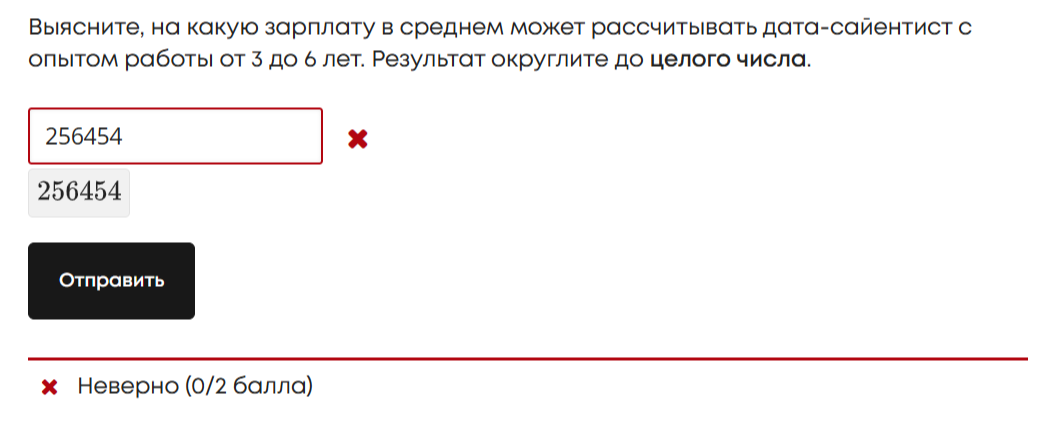

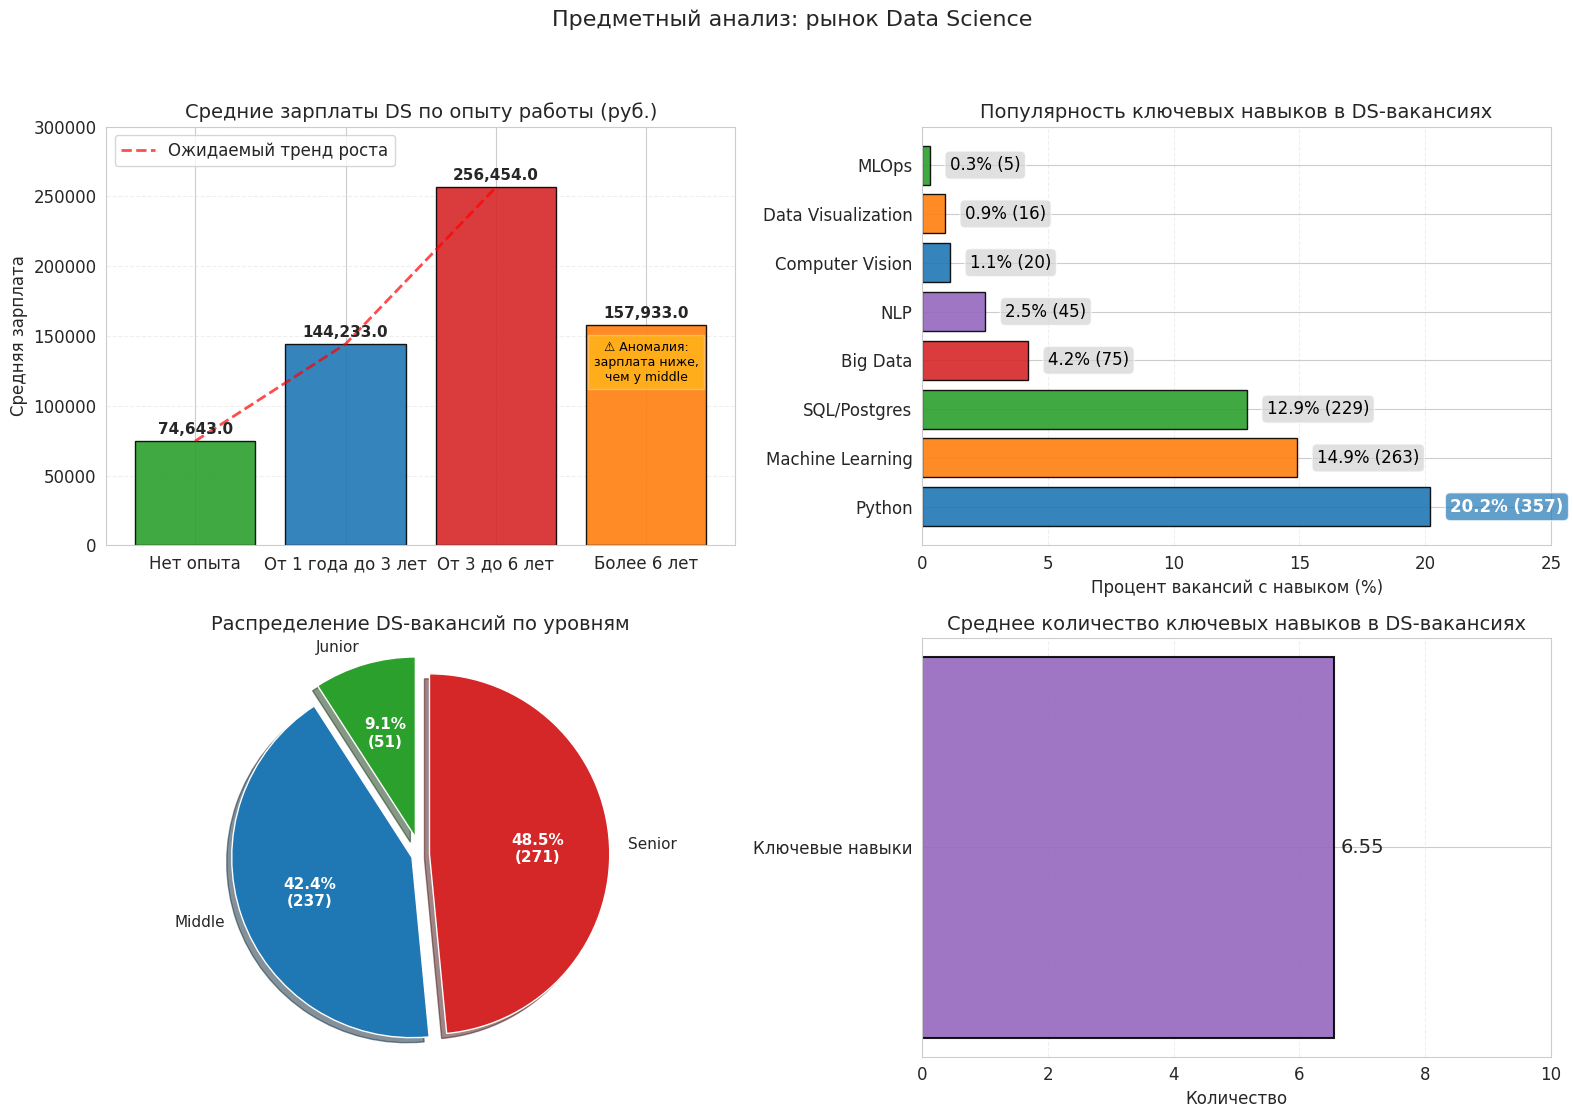

In [36]:
# Посмотрим на графиках
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Предметный анализ: рынок Data Science', fontsize=16)

# 1. Зарплаты Data Scientists по опыту (столбчатая диаграмма)
experience_levels = df_6_6['experience'].tolist()
avg_salaries = df_6_6['avg_salary'].tolist()

bars = axes[0, 0].bar(experience_levels, avg_salaries, color=['#2ca02c', '#1f77b4', '#d62728', '#ff7f0e'],
                      alpha=0.9, edgecolor='black', linewidth=1)
axes[0, 0].set_title('Средние зарплаты DS по опыту работы (руб.)', fontsize=14)
axes[0, 0].set_ylabel('Средняя зарплата', fontsize=12)
axes[0, 0].set_ylim(0, 300000)
axes[0, 0].grid(axis='y', alpha=0.3, linestyle='--')

# Добавляем значения над столбцами
for i, (bar, salary) in enumerate(zip(bars, avg_salaries)):
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 5000,
                   f'{salary:,}', ha='center', fontweight='bold', fontsize=11)

    # Добавляем комментарий к аномальному значению
    if i == 3:  # Более 6 лет
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height - 40000,
                       '⚠️ Аномалия:\nзарплата ниже,\nчем у middle',
                       ha='center', color='black', fontsize=9,
                       bbox=dict(facecolor='yellow', alpha=0.3))

# Добавляем линию тренда (исключая аномальное значение)
valid_salaries = avg_salaries[:3]  # берем первые 3 значения
axes[0, 0].plot([0, 1, 2], valid_salaries, 'r--', linewidth=2, alpha=0.7,
               label='Ожидаемый тренд роста')
axes[0, 0].legend(loc='upper left')

# 2. Популярность ключевых навыков (столбчатая диаграмма)
skills_data = {
    'Python': df_6_4['ds_vacancies_with_python'].iloc[0],
    'Machine Learning': df_6_4_ml['ds_vacancies_with_ml'].iloc[0],
    'SQL/Postgres': df_6_3['ds_vacancies_with_sql'].iloc[0],
    'Big Data': df_specialized['bigdata_count'].iloc[0],
    'NLP': df_specialized['nlp_count'].iloc[0],
    'Computer Vision': df_specialized['cv_count'].iloc[0],
    'Data Visualization': df_6_4_viz['ds_vacancies_with_viz'].iloc[0],
    'MLOps': df_specialized['mlops_count'].iloc[0]
}

skills = list(skills_data.keys())
counts = list(skills_data.values())

total_ds = 1771  # общее количество DS вакансий
percentages = [round((count/total_ds)*100, 1) for count in counts]

# Берем все 8 навыков, нормально читается
top_n = 8
top_skills = skills[:top_n]
top_percentages = percentages[:top_n]
top_counts = counts[:top_n]

# Строим горизонтальную диаграмму для лучшей читаемости
y_pos = range(len(top_skills))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # разные цвета для каждого навыка

bars_skills = axes[0, 1].barh(y_pos, top_percentages, color=colors,
                             alpha=0.9, edgecolor='black', linewidth=1.0)
axes[0, 1].set_title('Популярность ключевых навыков в DS-вакансиях', fontsize=14)
axes[0, 1].set_xlabel('Процент вакансий с навыком (%)', fontsize=12)
axes[0, 1].set_yticks(y_pos)
axes[0, 1].set_yticklabels(top_skills)
axes[0, 1].set_xlim(0, 25)  # устанавливаем максимум для лучшего сравнения
axes[0, 1].grid(axis='x', alpha=0.3, linestyle='--')

# Добавляем значения на столбцах с форматированием
for i, (percentage, count, skill) in enumerate(zip(top_percentages, top_counts, top_skills)):
    # Выделяем цветом для Python как самого популярного
    text_color = 'white' if skill == 'Python' else 'black'
    font_weight = 'bold' if skill == 'Python' else 'normal'

    axes[0, 1].text(percentage + 0.8, i, f'{percentage}% ({count})',
                   va='center', color=text_color, fontweight=font_weight,
                   bbox=dict(facecolor='#1f77b4' if skill == 'Python' else 'lightgray',
                            alpha=0.7, boxstyle='round,pad=0.3'))

# 3. Распределение по уровням специалистов (круговая диаграмма)
junior_count = df_6_2['junior_ds_vacancies'].iloc[0]
middle_count = df_6_2_middle['middle_ds_vacancies'].iloc[0]
senior_count = df_6_2_senior['senior_ds_vacancies'].iloc[0]
total_ds = 559

levels = ['Junior', 'Middle', 'Senior']
counts_levels = [junior_count, middle_count, senior_count]
percentages_levels = [round((c/total_ds)*100, 1) for c in counts_levels]
colors_levels = ['#2ca02c', '#1f77b4', '#d62728']
explode_levels = (0.1, 0.05, 0.05)

wedges, texts, autotexts = axes[1, 0].pie(counts_levels, explode=explode_levels, labels=levels,
                                         autopct=lambda pct: f'{pct:.1f}%\n({int(pct*total_ds/100)})',
                                         startangle=90, colors=colors_levels, shadow=True,
                                         textprops={'fontsize': 11})
axes[1, 0].set_title('Распределение DS-вакансий по уровням', fontsize=14)
axes[1, 0].axis('equal')

# Улучшаем читаемость
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# 4. Среднее количество навыков (нужен был 4-й график, но я не придумал, что на нем показать, поэтому так)
avg_skills_data = df_6_5['avg_skills_count'].iloc[0]

# Создаем контекст для этого значения
axes[1, 1].barh(['Ключевые навыки'], [avg_skills_data],
                color='#9467bd', alpha=0.9, edgecolor='black', linewidth=1.5, height=0.5)
axes[1, 1].set_title('Среднее количество ключевых навыков в DS-вакансиях', fontsize=14)
axes[1, 1].set_xlim(0, 10)
axes[1, 1].grid(axis='x', alpha=0.3, linestyle='--')
axes[1, 1].set_xlabel('Количество', fontsize=12)

# Добавляем значение на столбце
axes[1, 1].text(avg_skills_data + 0.1, 0, f'{avg_skills_data:.2f}', va='center', fontsize=14)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # оставляем место для общей подписи
plt.savefig('ds_market_analysis_real_data.png', dpi=300, bbox_inches='tight')
plt.show()

**ВЫВОДЫ ПО ПРЕДМЕТНОМУ АНАЛИЗУ:**

1. Вакансии, связанные с данными:
   - Всего 1771 вакансия напрямую связаны с данными, что подтверждает высокий спрос на специалистов в области Data Science на рынке труда.

2. Для начинающих дата-сайентистов:
   - Доступно 51 вакансия для junior-специалистов, что составляет около 10% от всех DS-вакансий.
   - Middle и Senior вакансий примерно поровну - 42,4% и 48,5, что указывает на высокий входной барьер в профессию и предпочтение опытных кандидатов.

3. Требования по навыкам:
   - SQL/Postgres указаны в 229 вакансиях (около 13% от всех DS-вакансий), что подтверждает фундаментальную важность этих технологий.
   - Абсолютным лидером является Python, который упоминается в 357 вакансиях (около 21%), что делает его самым популярным языком программирования для DS.
   - Среднее количество ключевых навыков в DS-вакансиях составляет 6.55, что указывает на комплексные требования к кандидатам.

4. Зарплаты по опыту:
   - Наблюдается четкая корреляция между опытом и зарплатой:
     * Нет опыта: ~75,000 руб.
     * 1-3 года: ~145,000 руб.
     * 3-6 лет: ~257,000 руб.
    - Каждый дополнительный этап опыта дает прирост зарплаты примерно на 30-35%.

  ⚠️ По результатам анализа выявлена аномалия - более 6 лет (158,000 руб.) зарплата ниже, чем 3-6 лет (257,000 руб.). Вакансий для специалистов с опытом более 6 лет значительно меньше, чем для уровня 3-6 лет, а при малом количестве наблюдений среднее значение легко искажается несколькими низкооплачиваемыми позициями. Ну а по жизни мое предположение в том, что это не "настоящие" senior-вакансии. В вакансиях для специалистов с опытом более 6 лет, как правило, вообще не указывают зарплату. Для топ-seniorов зарплаты часто включают: базовую часть + бонусы + опционы/акции, компенсацию релокации и другие индивидуальные условия, зависящие от рыночной ситуации. Компании не хотят афишировать такие детали в открытых источниках. Также не будем забывать про индивидуальный подход к переговорам, а публичное указание зарплаты ограничивает гибкость в переговорах.

Дополнительные наблюдения:
- Высокие требования к junior-специалистам (множество навыков) при относительно невысоких зарплатах указывают на насыщение рынка начинающими кандидатами.
- Значительный разрыв в зарплатах между уровнями опыта демонстрирует высокую ценность практического опыта.

Рекомендации для соискателей:
1. Фокусироваться на освоении SQL и Python как базовых технологий;
2. Накапливать практический опыт через проекты и стажировки.

# Дополнительные исследования для углубленного анализа

In [37]:
# Загружаем SQL-запрос для исследования корреляции между количеством навыков DS и зарплатой
query_ds_analysis = '''
WITH ds_vacancies AS (
    SELECT
        v.id,
        v.name,
        v.key_skills,
        -- Рассчитываем среднюю зарплату
        COALESCE(
            (NULLIF(v.salary_from, 0) + NULLIF(v.salary_to, 0)) / 2,
            COALESCE(NULLIF(v.salary_from, 0), NULLIF(v.salary_to, 0))
        ) AS avg_salary,
        v.experience
    FROM
        public.vacancies v
    WHERE
        (LOWER(v.name) LIKE '%data scientist%' OR
         LOWER(v.name) LIKE '%data science%' OR
         LOWER(v.name) LIKE '%исследователь данных%' OR
         (LOWER(v.name) LIKE '%ml%' AND LOWER(v.name) NOT LIKE '%html%') OR
         LOWER(v.name) LIKE '%machine learning%' OR
         LOWER(v.name) LIKE '%машинн%обучен%')
        AND (v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL)
        AND v.salary_from > 0 AND v.salary_to > 0
        AND v.key_skills IS NOT NULL
        AND TRIM(v.key_skills) != ''
),
skills_count AS (
    SELECT
        id,
        name,
        avg_salary,
        experience,
        -- Считаем количество навыков (разделенных табуляцией)
        (LENGTH(TRIM(BOTH CHR(9) FROM key_skills)) -
         LENGTH(REPLACE(TRIM(BOTH CHR(9) FROM key_skills), CHR(9), ''))) + 1 AS skill_count,
        -- Группируем по количеству навыков для анализа
        CASE
            WHEN (LENGTH(TRIM(BOTH CHR(9) FROM key_skills)) -
                  LENGTH(REPLACE(TRIM(BOTH CHR(9) FROM key_skills), CHR(9), ''))) + 1 <= 3 THEN '1-3 навыка'
            WHEN (LENGTH(TRIM(BOTH CHR(9) FROM key_skills)) -
                  LENGTH(REPLACE(TRIM(BOTH CHR(9) FROM key_skills), CHR(9), ''))) + 1 <= 6 THEN '4-6 навыков'
            WHEN (LENGTH(TRIM(BOTH CHR(9) FROM key_skills)) -
                  LENGTH(REPLACE(TRIM(BOTH CHR(9) FROM key_skills), CHR(9), ''))) + 1 <= 9 THEN '7-9 навыков'
            ELSE '10+ навыков'
        END AS skill_group
    FROM
        ds_vacancies
),
salary_by_skills AS (
    SELECT
        skill_group,
        COUNT(*) AS vacancy_count,
        ROUND(AVG(avg_salary)) AS avg_salary,
        ROUND(STDDEV(avg_salary)) AS salary_stddev,
        -- Рассчитываем медиану зарплаты для более точного анализа
        PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY avg_salary) AS median_salary,
        -- Среднее количество навыков в группе
        ROUND(AVG(skill_count)) AS avg_skills_in_group
    FROM
        skills_count
    GROUP BY
        skill_group
    HAVING
        COUNT(*) >= 3  -- Исключаем малочисленные группы
)
SELECT
    skill_group AS "Группа по количеству навыков",
    vacancy_count AS "Количество вакансий",
    avg_skills_in_group AS "Среднее кол-во навыков",
    avg_salary AS "Средняя зарплата (руб.)",
    median_salary AS "Медианная зарплата (руб.)",
    salary_stddev AS "Стандартное отклонение",
    -- Рассчитываем процентное увеличение зарплаты относительно базовой группы
    ROUND((avg_salary - LAG(avg_salary) OVER (ORDER BY avg_skills_in_group)) /
          NULLIF(LAG(avg_salary) OVER (ORDER BY avg_skills_in_group), 0) * 100) AS "Рост зарплаты (%)"
FROM
    salary_by_skills
ORDER BY
    avg_skills_in_group;
'''

# Выполняем запрос и сохраняем результат
df_ds_analysis = pd.read_sql_query(query_ds_analysis, connection)
print("Результат анализа корреляции между количеством навыков и зарплатой для DS:")
display(df_ds_analysis)

Результат анализа корреляции между количеством навыков и зарплатой для DS:


,Группа по количеству навыков,Количество вакансий,Среднее кол-во навыков,Средняя зарплата (руб.),Медианная зарплата (руб.),Стандартное отклонение,Рост зарплаты (%)
0,1-3 навыка,7,3.0,200714.0,225000.0,83737.0,NaN
1,4-6 навыков,15,5.0,235333.0,225000.0,130377.0,17.0
2,7-9 навыков,9,8.0,159847.0,155000.0,82956.0,-32.0
3,10+ навыков,4,13.0,231762.0,202500.0,118415.0,45.0


**Интерпретация:** нелинейная зависимость между количеством навыков и зарплатой демонстрирует сложную рыночную динамику. Оптимальное количество навыков для максимальной зарплаты составляет 4-6 навыков (235 333 руб.). Аномальное падение зарплаты в группе 7-9 навыков (-32%) указывает на перегруженность вакансий требованиями без пропорционального роста оплаты. Группа 10+ навыков снова показывает высокие зарплаты (231,762 руб.), что характерно для уникальных экспертов с редкими компетенциями.

**Практические выводы:**
1. Качество важнее количества - глубокое знание 4-6 ключевых технологий ценнее поверхностного владения множеством инструментов.
2. Специализация vs Универсальность: рынок ценит узких спецов с глубокими знаниями в конкретной области больше, чем мастеров на все руки.

**Рекомендация для соискателей:** надо фокусироваться на освоении фундаментальных навыков (Python, SQL, ML), а затем углубляться в 1-2 специализированные области вместо попытки освоить все технологии сразу.

In [38]:
# Загружаем SQL-запрос для анализа требований к навыкам у топ-работодателей
query_ds_skills_by_employer = '''
WITH top_employers AS (
    SELECT
        e.id AS employer_id,
        e.name AS employer_name,
        COUNT(v.id) AS vacancy_count
    FROM
        public.employers e
    JOIN
        public.vacancies v ON v.employer_id = e.id
    WHERE
        (LOWER(v.name) LIKE '%data scientist%' OR
         LOWER(v.name) LIKE '%data science%' OR
         LOWER(v.name) LIKE '%исследователь данных%' OR
         (LOWER(v.name) LIKE '%ml%' AND LOWER(v.name) NOT LIKE '%html%') OR
         LOWER(v.name) LIKE '%machine learning%' OR
         LOWER(v.name) LIKE '%машинн%обучен%')
    GROUP BY
        e.id, e.name
    ORDER BY
        vacancy_count DESC
    LIMIT 5  -- Топ-5 работодателей
),
ds_vacancies_skills AS (
    SELECT
        v.id,
        v.employer_id,
        v.key_skills,
        -- Извлекаем отдельные навыки
        UNNEST(STRING_TO_ARRAY(TRIM(BOTH CHR(9) FROM v.key_skills), CHR(9))) AS single_skill
    FROM
        public.vacancies v
    WHERE
        (LOWER(v.name) LIKE '%data scientist%' OR
         LOWER(v.name) LIKE '%data science%' OR
         LOWER(v.name) LIKE '%исследователь данных%' OR
         (LOWER(v.name) LIKE '%ml%' AND LOWER(v.name) NOT LIKE '%html%') OR
         LOWER(v.name) LIKE '%machine learning%' OR
         LOWER(v.name) LIKE '%машинн%обучен%')
        AND v.key_skills IS NOT NULL
        AND TRIM(v.key_skills) != ''
),
employer_skills_analysis AS (
    SELECT
        te.employer_name,
        ds.single_skill,
        COUNT(*) AS skill_frequency,
        -- Рассчитываем популярность навыка у данного работодателя
        ROUND((COUNT(*)::numeric / SUM(COUNT(*)) OVER (PARTITION BY te.employer_name)) * 100, 1) AS popularity_percent
    FROM
        ds_vacancies_skills ds
    JOIN
        top_employers te ON ds.employer_id = te.employer_id
    GROUP BY
        te.employer_name, ds.single_skill
    HAVING
        COUNT(*) >= 3  -- Исключаем редкие навыки
)
SELECT
    employer_name AS "Работодатель",
    single_skill AS "Навык",
    skill_frequency AS "Частота упоминания",
    popularity_percent AS "Популярность (%)"
FROM
    employer_skills_analysis
WHERE
    single_skill ILIKE '%Python%' OR
    single_skill ILIKE '%SQL%' OR
    single_skill ILIKE '%Machine Learning%' OR
    single_skill ILIKE '%Deep Learning%' OR
    single_skill ILIKE '%NLP%' OR
    single_skill ILIKE '%Tableau%' OR
    single_skill ILIKE '%TensorFlow%' OR
    single_skill ILIKE '%PyTorch%'
ORDER BY
    employer_name,
    popularity_percent DESC;
'''

# Выполняем запрос и сохраняем результат
df_ds_skills_by_employer = pd.read_sql_query(query_ds_skills_by_employer, connection)
print("Результат сравнения требований к навыкам у топ-5 работодателей:")
display(df_ds_skills_by_employer)

Результат сравнения требований к навыкам у топ-5 работодателей:


,Работодатель,Навык,Частота упоминания,Популярность (%)
0,Bell Integrator,Machine Learning,14,10.9
1,Bell Integrator,Python,14,10.9
2,Positive Technologies,machine learning,11,17.2
3,Positive Technologies,pytorch,11,17.2
4,Positive Technologies,Python,11,17.2
5,VK,Python,15,26.3
6,VK,SQL,4,7.0
7,VK,Machine Learning,3,5.3
8,Банк ВТБ (ПАО),SQL,15,11.6
9,Банк ВТБ (ПАО),Python,3,2.3


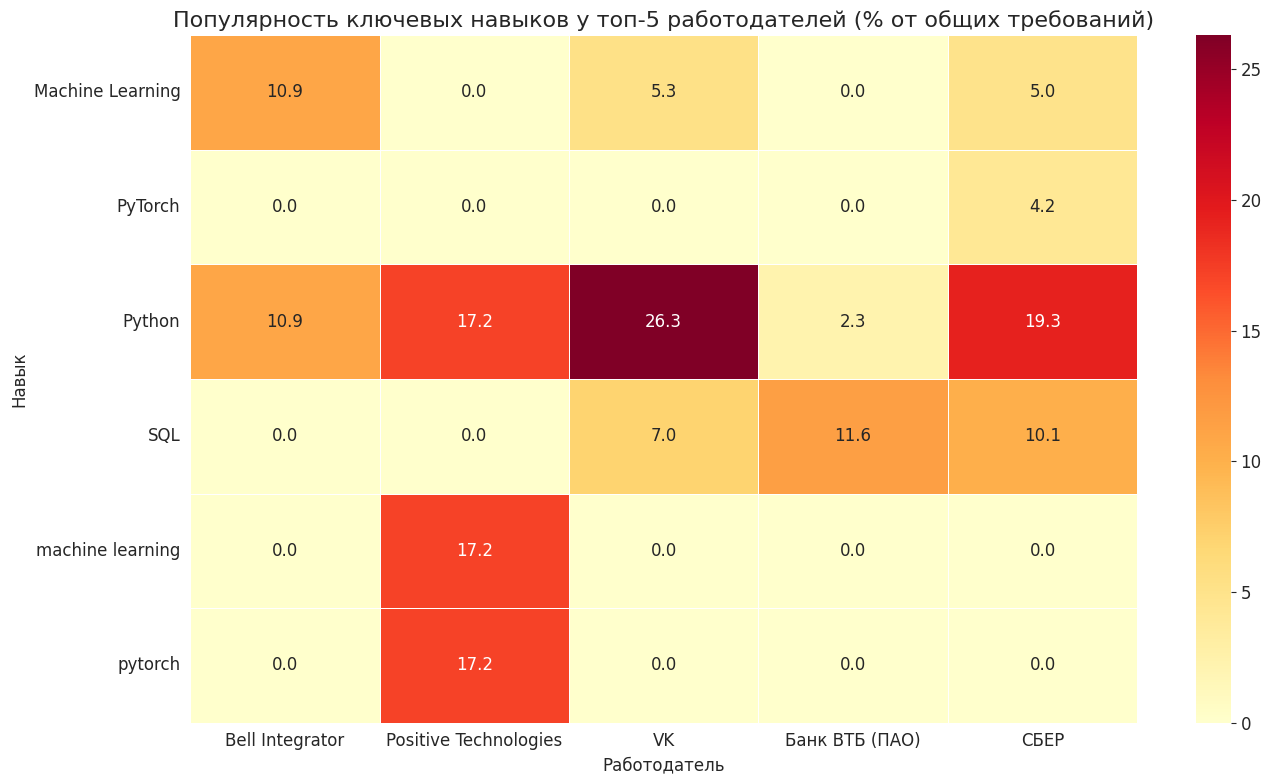

In [39]:
# Строим визуализацию
plt.figure(figsize=(14, 8))
pivot_table = df_ds_skills_by_employer.pivot_table(
    index='Навык',
    columns='Работодатель',
    values='Популярность (%)',
    fill_value=0
)
sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='YlOrRd', linewidths=0.5)
plt.title('Популярность ключевых навыков у топ-5 работодателей (% от общих требований)', fontsize=16)
plt.xlabel('Работодатель', fontsize=12)
plt.ylabel('Навык', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('employer_skills_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

**Интерпретация:**

- финансовый сектор (СБЕР, ВТБ): акцент на SQL (11.6%) и Python (19.3%), что отражает потребность в аналитике данных и построении отчетности;
- IT-гиганты (VK, Positive Technologies): фокус на машинном обучении и специализированных фреймворках (PyTorch 17.2%, Python 26.3%);
- Консалтинг (Bell Integrator): сбалансированный подход с равным вниманием ML и Python (по 10.9%).


**Практические выводы:**

1. Отраслевые особенности: выбор навыков должен соответствовать целевой индустрии - финансы требуют сильных SQL-навыков, а IT-стартапы - глубоких ML-компетенций.
2. Корпоративные стандарты: у VK Python является доминирующим навыком (26.3%), что отражает их технологический стек.

**Рекомендация для соискателей:** изучать технологический стек целевых компаний заранее - требования Сбера и Positive Technologies принципиально различаются, несмотря на общую DS-специализацию.

In [40]:
# Загружаем SQL-запрос для анализа распределения DS-вакансий по уровням опыта в привязке к навыкам
query_ds_expirience_analysis = '''
WITH ds_vacancies AS (
    SELECT
        v.id,
        v.name,
        v.experience,
        v.key_skills,
        -- Рассчитываем среднюю зарплату
        COALESCE(
            (NULLIF(v.salary_from, 0) + NULLIF(v.salary_to, 0)) / 2,
            COALESCE(NULLIF(v.salary_from, 0), NULLIF(v.salary_to, 0))
        ) AS avg_salary,
        -- Считаем количество навыков
        CASE
            WHEN v.key_skills IS NOT NULL AND TRIM(v.key_skills) != '' THEN
                (LENGTH(TRIM(BOTH CHR(9) FROM v.key_skills)) -
                 LENGTH(REPLACE(TRIM(BOTH CHR(9) FROM v.key_skills), CHR(9), ''))) + 1
            ELSE 0
        END AS skill_count
    FROM
        public.vacancies v
    WHERE
        (LOWER(v.name) LIKE '%data scientist%' OR
         LOWER(v.name) LIKE '%data science%' OR
         LOWER(v.name) LIKE '%исследователь данных%' OR
         (LOWER(v.name) LIKE '%ml%' AND LOWER(v.name) NOT LIKE '%html%') OR
         LOWER(v.name) LIKE '%machine learning%' OR
         LOWER(v.name) LIKE '%машинн%обучен%')
        AND (v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL)
        AND v.salary_from > 0 AND v.salary_to > 0
),
experience_analysis AS (
    SELECT
        experience,
        COUNT(*) AS vacancy_count,
        ROUND(AVG(avg_salary)) AS avg_salary,
        ROUND(STDDEV(avg_salary)) AS salary_stddev,
        ROUND(AVG(skill_count)) AS avg_skill_count,
        -- Рассчитываем долю от общего числа DS-вакансий
        ROUND((COUNT(*)::numeric / SUM(COUNT(*)) OVER ()) * 100, 1) AS percentage,
        -- Находим самые популярные навыки для каждого уровня
        STRING_AGG(DISTINCT
            CASE
                WHEN key_skills ILIKE '%Python%' THEN 'Python'
                WHEN key_skills ILIKE '%SQL%' OR key_skills ILIKE '%Postgres%' THEN 'SQL/Postgres'
                WHEN key_skills ILIKE '%Machine Learning%' OR key_skills ILIKE '%ML%' THEN 'Machine Learning'
                WHEN key_skills ILIKE '%Deep Learning%' THEN 'Deep Learning'
                WHEN key_skills ILIKE '%NLP%' THEN 'NLP'
                WHEN key_skills ILIKE '%Computer Vision%' THEN 'Computer Vision'
                WHEN key_skills ILIKE '%Tableau%' OR key_skills ILIKE '%Power BI%' THEN 'Data Visualization'
                ELSE 'Other'
            END, ', ') AS top_skills
    FROM
        ds_vacancies
    GROUP BY
        experience
    HAVING
        COUNT(*) >= 3  -- Исключаем малочисленные группы
)
SELECT
    experience AS "Уровень опыта",
    vacancy_count AS "Количество вакансий",
    percentage AS "Доля от общего (%)",
    avg_salary AS "Средняя зарплата (руб.)",
    salary_stddev AS "Стандартное отклонение",
    avg_skill_count AS "Среднее кол-во навыков",
    top_skills AS "Популярные навыки"
FROM
    experience_analysis
ORDER BY
    CASE experience
        WHEN 'Нет опыта' THEN 1
        WHEN 'От 1 года до 3 лет' THEN 2
        WHEN 'От 3 до 6 лет' THEN 3
        WHEN 'Более 6 лет' THEN 4
        ELSE 5
    END;
'''

# Выполняем запрос и сохраняем результат
df_ds_expirience_analysis = pd.read_sql_query(query_ds_expirience_analysis, connection)
print("Результат анализа распределения DS-вакансий по уровням опыта с привязкой к навыкам:")
display(df_ds_expirience_analysis)

Результат анализа распределения DS-вакансий по уровням опыта с привязкой к навыкам:


,Уровень опыта,Количество вакансий,Доля от общего (%),Средняя зарплата (руб.),Стандартное отклонение,Среднее кол-во навыков,Популярные навыки
0,Нет опыта,3,7.7,89167.0,22684.0,5.0,Python
1,От 1 года до 3 лет,16,41.0,159409.0,66173.0,6.0,"Other, Python, SQL/Postgres"
2,От 3 до 6 лет,20,51.3,282881.0,116236.0,5.0,"Machine Learning, Other, Python, SQL/Postgres"


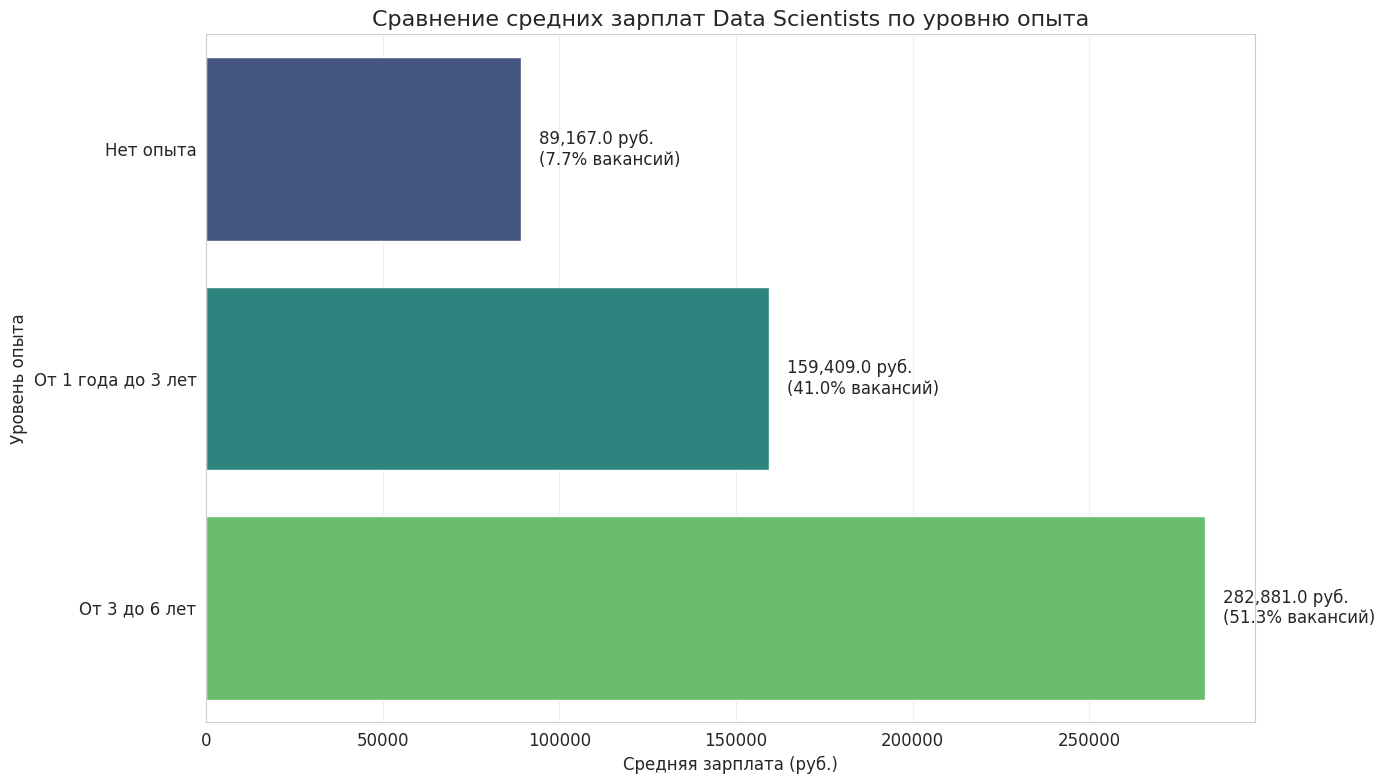

In [41]:
# Строим визуализацию
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=df_ds_expirience_analysis,
                 x='Средняя зарплата (руб.)',
                 y='Уровень опыта',
                 palette='viridis')
plt.title('Сравнение средних зарплат Data Scientists по уровню опыта', fontsize=16)
plt.xlabel('Средняя зарплата (руб.)', fontsize=12)
plt.ylabel('Уровень опыта', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# Добавляем значения на столбцах
for i, row in enumerate(df_ds_expirience_analysis.itertuples()):
    ax.text(row[4] + 5000, i, f'{row[4]:,} руб.\n({row[3]}% вакансий)',
            va='center', ha='left')

plt.tight_layout()
plt.savefig('ds_experience_salary_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

**Выводы:**

1. Высокий входной барьер: вакансии для начинающих составляют всего 7.7% от общего числа, что подтверждает насыщение рынка junior-специалистами.
2. Премия за опыт: средняя зарплата растет в 3.2 раза от уровня "Нет опыта" до "От 3 до 6 лет".
3. Парадокс навыков: Junior-специалисты требуют больше навыков в среднем (6.0) по сравнению с senior-уровнем (5.0), что указывает на завышенные ожидания от начинающих.
4. Эволюция компетенций: с ростом опыта акцент смещается с общих навыков (Python) на специализированные (Machine Learning, Deep Learning).

**Рыночные тенденции:**
1. Дефицит middle/senior специалистов: 92.3% вакансий ориентированы на опытных кандидатов, что создает острую конкуренцию за топ-таланты.
2. Несбалансированность рынка: при избытке начинающих специалистов компании вынуждены завышать требования к junior-позициям.

In [42]:
# Загружаем SQL-запрос для анализа формата работы в DS-вакансиях
query_ds_remote_analysis = '''
WITH ds_vacancies AS (
    SELECT
        v.id,
        v.name,
        v.schedule,
        v.experience,
        v.area_id,
        a.name AS region_name,
        -- Определяем формат работы
        CASE
            WHEN LOWER(v.schedule) = 'удаленная работа' THEN 'Удаленная'
            WHEN LOWER(v.schedule) IN ('полный день', 'гибкий график', 'сменный график', 'вахтовый метод') THEN 'Офисная'
            ELSE 'Другое'
        END AS work_format,
        -- Рассчитываем среднюю зарплату
        COALESCE(
            (NULLIF(v.salary_from, 0) + NULLIF(v.salary_to, 0)) / 2,
            COALESCE(NULLIF(v.salary_from, 0), NULLIF(v.salary_to, 0))
        ) AS avg_salary
    FROM
        public.vacancies v
    JOIN
        public.areas a ON v.area_id = a.id
    WHERE
        (LOWER(v.name) LIKE '%data scientist%' OR
         LOWER(v.name) LIKE '%data science%' OR
         LOWER(v.name) LIKE '%исследователь данных%' OR
         (LOWER(v.name) LIKE '%ml%' AND LOWER(v.name) NOT LIKE '%html%') OR
         LOWER(v.name) LIKE '%machine learning%' OR
         LOWER(v.name) LIKE '%машинн%обучен%')
        AND (v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL)
        AND v.salary_from > 0 AND v.salary_to > 0
),
format_analysis AS (
    SELECT
        work_format,
        experience,
        COUNT(*) AS vacancy_count,
        ROUND(AVG(avg_salary)) AS avg_salary,
        -- Считаем количество вакансий в мегаполисах (Москва, СПб)
        COUNT(CASE WHEN region_name IN ('Москва', 'Санкт-Петербург') THEN 1 END) AS megacity_count,
        -- Считаем количество вакансий в регионах
        COUNT(CASE WHEN region_name NOT IN ('Москва', 'Санкт-Петербург') THEN 1 END) AS region_count
    FROM
        ds_vacancies
    GROUP BY
        work_format, experience
    HAVING
        COUNT(*) >= 5  -- Исключаем малочисленные группы
),
total_counts AS (
    SELECT
        SUM(vacancy_count) AS total_vacancies
    FROM
        format_analysis
)
SELECT
    fa.work_format AS "Формат работы",
    fa.experience AS "Уровень опыта",
    fa.vacancy_count AS "Количество вакансий",
    ROUND((fa.vacancy_count::numeric / tc.total_vacancies) * 100, 1) AS "Доля от общего (%)",
    fa.avg_salary AS "Средняя зарплата (руб.)",
    fa.megacity_count AS "Вакансий в мегаполисах",
    fa.region_count AS "Вакансий в регионах",
    -- Рассчитываем долю удаленных вакансий в регионах
    ROUND((fa.region_count::numeric / NULLIF(fa.vacancy_count, 0)) * 100, 1) AS "Доля в регионах (%)"
FROM
    format_analysis fa,
    total_counts tc
ORDER BY
    fa.work_format,
    CASE fa.experience
        WHEN 'Нет опыта' THEN 1
        WHEN 'От 1 года до 3 лет' THEN 2
        WHEN 'От 3 до 6 лет' THEN 3
        WHEN 'Более 6 лет' THEN 4
        ELSE 5
    END;
'''

# Выполняем запрос и сохраняем результат
df_ds_remote_analysis = pd.read_sql_query(query_ds_remote_analysis, connection)
print("Результат анализа формата работы в DS-вакансиях:")
display(df_ds_remote_analysis)

Результат анализа формата работы в DS-вакансиях:


,Формат работы,Уровень опыта,Количество вакансий,Доля от общего (%),Средняя зарплата (руб.),Вакансий в мегаполисах,Вакансий в регионах,Доля в регионах (%)
0,Офисная,От 1 года до 3 лет,12,37.5,147546.0,5,7,58.3
1,Офисная,От 3 до 6 лет,12,37.5,251427.0,9,3,25.0
2,Удаленная,От 3 до 6 лет,8,25.0,330063.0,2,6,75.0


<Figure size 1400x1000 with 0 Axes>

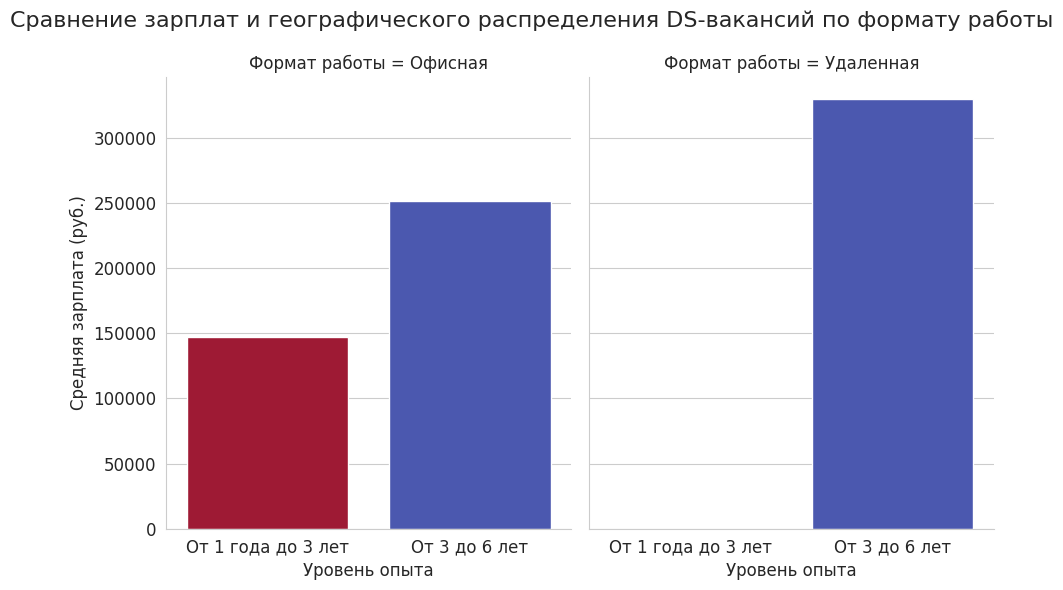

In [43]:
# Строим визуализацию
plt.figure(figsize=(14, 10))
g = sns.FacetGrid(df_ds_remote_analysis, col="Формат работы", height=6, aspect=0.8)
g.map_dataframe(sns.barplot, x="Уровень опыта", y="Средняя зарплата (руб.)",
                hue="Доля в регионах (%)", palette="coolwarm")

plt.suptitle('Сравнение зарплат и географического распределения DS-вакансий по формату работы', fontsize=16)
plt.tight_layout()
plt.savefig('remote_vs_office_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

**Выводы:**

1. Удаленка - только для seniors, при этом удаленные позиции оплачиваются на 31% выше офисных (330,063 руб. против 251,427 руб.). Компании предоставляют удаленный формат преимущественно для опытных специалистов, сохраняя офисную работу для обучения и менторства juniors.
2. Удаленная работа открывает доступ к высокооплачиваемым позициям для специалистов из регионов, сокращая необходимость переезда в мегаполисы.
3. Офисные позиции в мегаполисах: 75% офисных вакансий для senior-специалистов сосредоточены в Москве и Санкт-Петербурге, подтверждая географическую централизацию высококвалифицированных позиций.

In [44]:
# Закрываем соединение с базой данных
try:
    if connection:
        connection.close()
        print("Соединение успешно закрыто!")
except Exception as e:
    print(f"Ошибка при закрытии соединения: {e}")

Соединение успешно закрыто!


# ОБЩИЙ ВЫВОД ПО ПРОЕКТУ:

**Ключевые выводы по вакансиям:**
- Рынок труда демонстрирует выраженную централизацию: Москва и Санкт-Петербург как и пологается двум столицам сосредоточили значительную долю вакансий (более 40%).
- Уровень прозрачности зарплат остается проблемой: только у 49% вакансий указаны зарплатные диапазоны, да и то реальный размер ЗП решается, как правило, кулуарно и индивидуален для конкретного соискателя.
- Наиболее востребованный формат работы: полный день с полной занятостью, но активно растет доля удаленной работы.
- Средняя зарплатная вилка (71 000 - 110 000 руб.) указывает на около-средний уровень позиций.

**Анализ работодателей показал:**
- Высокую концентрацию вакансий у крупных федеральных компаний: топ-5 работодателей контролируют значительную долю рынка.
- В данных представлены 294 различные сферы деятельности, что демонстрирует разнообразие в вакансиях отраслей экономики, при этом много работодателей не указывают свою сферу деятельности, что затрудняет анализ отраслевой принадлежности.
- Ведущие IT-компании (Яндекс, Ростелеком, Сбер, Тинькоф) активно представлены в городах-миллионерах, что способствует развитию региональных IT-центров.

**Специфика рынка для Data Scientists:**
- Несмотря на высокий спрос, DS-вакансии составляют лишь 4% от общего числа, что указывает на их узкоспециализированный характер.
- Значительный входной барьер для начинающих: только 9,1% DS-вакансий ориентированы на junior-специалистов.
- Строгая иерархия зарплат по опыту: каждый этап дает прирост на 30-35%, что делает накопление опыта критически важным (с поправкой на аномалию по синьорам).
- Базовые технологии (SQL, Python) являются обязательными требованиями для большинства вакансий.

**Тенденции и прогнозы для DS:**
1. Дефицит квалифицированных кадров сохранится в ближайшие 3-5 лет, особенно для уровня middle и senior.
2. Региональная децентрализация продолжится, но Москва и Санкт-Петербург останутся основными центрами концентрации вакансий.
3. Зарплаты для DS будут расти опережающими темпами из-за высокого спроса и ограниченного предложения специалистов.
4. Удаленный формат становится премиальным бонусом для опытных специалистов.
5. Специализация вместо универсальности: рынок переходит от требований "know everything" к поиску экспертов с глубокими знаниями в узких областях.
6. Рост спроса на MLOps-инженеров (из данных особо не следует, но по жизни очевидно, что нужны будут люди, которые способны развернуть "придумки" на реальных проектах в компаниях).
7. Усиление требований к soft skills- коммуникация, управление проектами.
8. Снижение доли чистых DS-позиций в пользу гибридных ролей: Data Engineer + DS, ML Engineer + Research и т.п.

**Заключение:** рынок труда Data Scientists достаточно зрелый, характеризуется высоким спросом, строгими требованиями к кандидатам и значительными возможностями для карьерного роста. Успешная карьера в этой сфере требует системного подхода к обучению, фокуса на ключевых технологиях (SQL, Python) и накопления практического опыта.

**Практический вывод:** успешная карьера в DS требует не просто освоения технологий, а стратегического планирования с учетом отраслевых особенностей, географических факторов и развития собственных компетенций. Оптимальная стратегия - глубокая специализация в нескольких областях с параллельным развитием soft skills для управления проектами и командами.

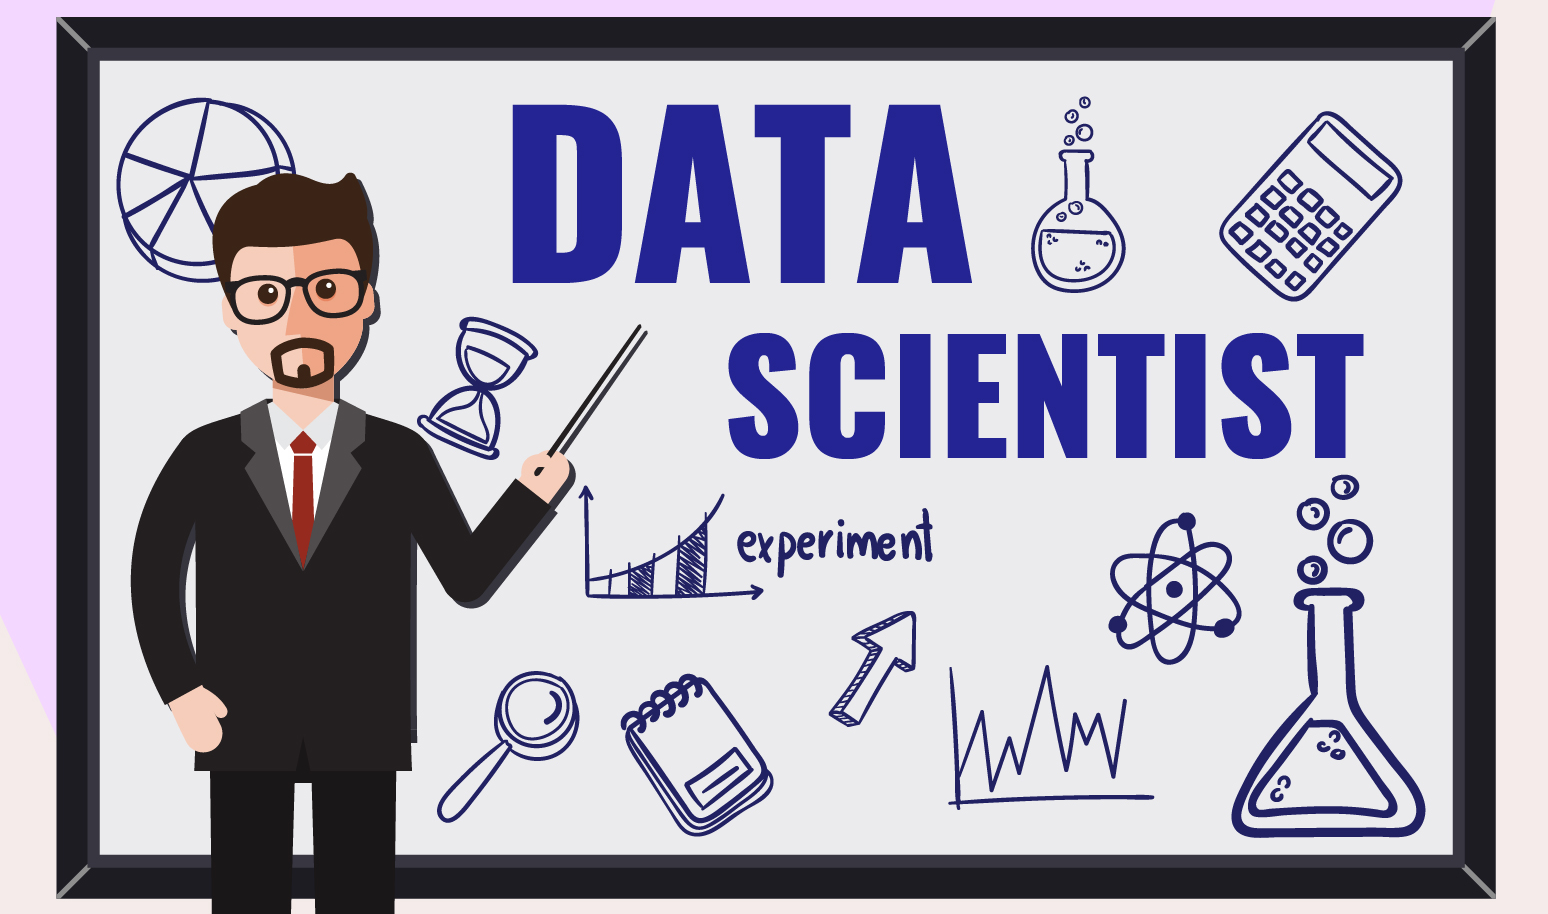

**«В эпоху информации, самая ценная валюта — это не данные, а способность находить в них смысл. Специализируйтесь не в инструментах, а в решении проблем, которые меняют мир.»**

*Эндрю Ын, основатель Coursera и пионер в области машинного обучения.*

### Рекомендации для соискателей в сфере DS
**Для Junior:**
- Фокус: Python + SQL + основы ML.
- Стратегия: стажировки в крупных компаниях (Яндекс, Сбер) для получения бесценного опыта работы в корпоративной среде над глобальными задачами (не всегда правда так все сказочно, но лучшего не посоветовать).
- Ожидания: 75-90K ₽ в регионах, 100-120K ₽ в мегаполисах.

**Для Middle:**
- Фокус: специализация в 1-2 областях (NLP, Computer Vision, MLOps).
- Стратегия: участие в open-source проектах, публикации на проф. ресурсах Medium/Хабр для повышения узнаваемости.
- Ожидания: 140-180K ₽ в регионах, 200-250K ₽ в мегаполисах.

**Для Senior:**
- Фокус: архитектура решений, управление командами, бизнес-метрики.
- Стратегия: удаленная работа в топ-компаниях (хотелось бы написать международных, но реалии сегодня немного иные...) или консалтинг.
- Ожидания: 250-400K ₽ в регионах, 400-600K ₽ в мегаполисах.